# PROJECT - FOOTBALL DATA ANALYSIS

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

LOADING ALL DATASETS 

In [2]:
A_df = pd.read_excel('appearances.xlsx')
GE_df = pd.read_excel('game_events.xlsx')
GL_df = pd.read_excel('game_lineups.xlsx')
G_df = pd.read_excel('games.xlsx')
p_df = pd.read_excel('players.xlsx')

DATASET UNDERSTANDING

In [3]:
# APPEARANCE DATASET 

In [4]:
A_df.head()

# A_df.head() is used to display the first 5 rows of the DataFrame A_df

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3


In [5]:
A_df.shape

# A_df.shape is used to determine the dimensions of the DataFrame A_df

(3568, 11)

In [6]:
A_df.isnull().sum() 

# A_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame A_df

appearance_id     0
game_id           0
player_id         0
date              0
player_name       0
competition_id    0
yellow_cards      0
red_cards         0
goals             0
assists           0
minutes_played    0
dtype: int64

In [7]:
for i in A_df.columns:
    print('No of Unique values in' , i , A_df[i].nunique())

# This code iterates through each column i of the DataFrame A_df. For each column,
#it calculates and prints the number of unique values present in that column. 

No of Unique values in appearance_id 3568
No of Unique values in game_id 3268
No of Unique values in player_id 92
No of Unique values in date 1267
No of Unique values in player_name 92
No of Unique values in competition_id 31
No of Unique values in yellow_cards 3
No of Unique values in red_cards 2
No of Unique values in goals 5
No of Unique values in assists 3
No of Unique values in minutes_played 90


In [8]:
A_df.dtypes

# A_df.dtypes is used to determine the data types of each column in the DataFrame A_df after changing datatypes

appearance_id             object
game_id                    int64
player_id                  int64
date              datetime64[ns]
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [9]:
for col in A_df.columns:
    if A_df[col].dtype == 'object':
        A_df[col] = A_df[col].astype('category')

# This code iterates through each column col of the DataFrame A_df. For columns with a data type of 'object', it converts the data type to 'category'.
# This optimization can improve memory usage and performance for categorical data, especially when dealing with large datasets.

In [10]:
A_df.dtypes

# A_df.dtypes is used to determine the data types of each column in the DataFrame A_df

appearance_id           category
game_id                    int64
player_id                  int64
date              datetime64[ns]
player_name             category
competition_id          category
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [11]:
A_df.to_excel('Appearance_df.xlsx', index=False)

In [12]:
# appearance_id is the primarykey in Appearance dataset
# game_id, player_id are the foreignkeys in Appearance dataset

In [13]:
# GAME EVENTS DATASET

In [14]:
GE_df.head()

# GE_df.head() is used to display the first 5 rows of the DataFrame GE_df

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0


In [15]:
GE_df.shape

# GE_df.shape is used to determine the dimensions of the DataFrame GE_df

(1849, 9)

In [16]:
GE_df.isnull().sum() 

# GE_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame GE_df

game_event_id          0
date                   0
game_id                0
minute                 0
type                   0
player_id              0
description          933
player_in_id         694
player_assist_id    1709
dtype: int64

In [17]:
for i in GE_df.columns:
    print('No of Unique values in' , i , GE_df[i].nunique())

# This code iterates through each column i of the DataFrame GE_df. For each column,
# it calculates and prints the number of unique values present in that column. 

No of Unique values in game_event_id 1849
No of Unique values in date 1018
No of Unique values in game_id 1582
No of Unique values in minute 102
No of Unique values in type 3
No of Unique values in player_id 77
No of Unique values in description 257
No of Unique values in player_in_id 669
No of Unique values in player_assist_id 86


In [18]:
# Impute missing values
for column in GE_df.columns:
    if GE_df[column].dtype == 'object':
        # For categorical columns, fill with the mode
        GE_df[column].fillna(GE_df[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the mean
        GE_df[column].fillna(GE_df[column].median(), inplace=True)

# This code iterates through each column column of the DataFrame GE_df. For categorical columns,
# missing values are filled with the mode, while for numerical columns, missing values are filled with the median.

In [19]:
GE_df.isnull().sum() 

# GE_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame GE_df : AFTER IMPUTING

game_event_id       0
date                0
game_id             0
minute              0
type                0
player_id           0
description         0
player_in_id        0
player_assist_id    0
dtype: int64

In [20]:
GE_df.dtypes

# GE_df.dtypes is used to determine the data types of each column in the DataFrame GE_df

game_event_id               object
date                datetime64[ns]
game_id                      int64
minute                       int64
type                        object
player_id                    int64
description                 object
player_in_id               float64
player_assist_id           float64
dtype: object

In [21]:
for col in GE_df.columns:
    if GE_df[col].dtype == 'object':
        GE_df[col] = GE_df[col].astype('category')

# This code iterates through each column col of the DataFrame GE_df. For columns with a data type of 'object', it converts the data type to 'category'.
# This optimization can improve memory usage and performance for categorical data, especially when dealing with large datasets.

In [22]:
GE_df = GE_df.astype({"player_in_id":'int64',"player_assist_id":'int64'})

# For columns with a data type of 'float64', it converts the data type to 'int64'.

In [23]:
GE_df.dtypes

# GE_df.dtypes is used to determine the data types of each column in the DataFrame GE_df after changing datatypes

game_event_id             category
date                datetime64[ns]
game_id                      int64
minute                       int64
type                      category
player_id                    int64
description               category
player_in_id                 int64
player_assist_id             int64
dtype: object

In [24]:
GE_df.to_excel('GameEvent_df.xlsx', index=False)

In [25]:
# game_event_id is the primarykey in game_event dataset
# game_id is the foreignkeys in game_event dataset

In [26]:
# GAMELINEUPS DATASET

In [27]:
GL_df.head()

# GL_df.head() is used to display the first 5 rows of the DataFrame GL_df

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back


In [28]:
GL_df.shape

# GL_df.shape is used to determine the dimensions of the DataFrame GL_df

(219, 8)

In [29]:
GL_df.isnull().sum() 

# GL_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame GL_df

game_lineups_id    0
game_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64

In [30]:
for i in GL_df.columns:
    print('No of Unique values in' , i , GL_df[i].nunique())

# This code iterates through each column i of the DataFrame GL_df. For each column,
# it calculates and prints the number of unique values present in that column. 

No of Unique values in game_lineups_id 219
No of Unique values in game_id 202
No of Unique values in type 2
No of Unique values in number 23
No of Unique values in player_id 27
No of Unique values in player_name 27
No of Unique values in team_captain 2
No of Unique values in position 11


In [31]:
GL_df.dtypes

# GL_df.dtypes is used to determine the data types of each column in the DataFrame GL_df 

game_lineups_id    object
game_id             int64
type               object
number              int64
player_id           int64
player_name        object
team_captain        int64
position           object
dtype: object

In [32]:
for col in GL_df.columns:
    if GL_df[col].dtype == 'object':
        GL_df[col] = GL_df[col].astype('category')

# This code iterates through each column col of the DataFrame GL_df. For columns with a data type of 'object', it converts the data type to 'category'.

In [33]:
GL_df.dtypes

# GL_df.dtypes is used to determine the data types of each column in the DataFrame GL_df after changing datatypes

game_lineups_id    category
game_id               int64
type               category
number                int64
player_id             int64
player_name        category
team_captain          int64
position           category
dtype: object

In [34]:
GL_df.to_excel('GameLineup_df.xlsx', index=False)

In [35]:
# game_lineups_id is the primarykey in game_lineup dataset
# game_id is the foreignkeys in game_lineup dataset

In [36]:
# GAME DATASET

In [37]:
G_df.head()

# G_df.head() is used to display the first 5 rows of the DataFrame G_df

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league


In [38]:
G_df.shape

# G_df.shape is used to determine the dimensions of the DataFrame G_df

(3268, 20)

In [39]:
G_df.isnull().sum() 

# G_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame G_df

game_id                      0
competition_id               0
season                       0
round                        0
date                         0
home_club_goals              0
away_club_goals              0
home_club_position         479
away_club_position         479
home_club_manager_name       5
away_club_manager_name       5
stadium                      0
attendance                 115
referee                      2
home_club_formation       3268
away_club_formation       3268
home_club_name             110
away_club_name              63
aggregate                    0
competition_type             0
dtype: int64

In [40]:
G_df.drop(columns=['home_club_formation', 'away_club_formation'], inplace=True)

# DROPING UNNECESSARY COLUMNS IN G_df

In [41]:
# Impute missing values
for column in G_df.columns:
    if G_df[column].dtype == 'object':
        # For categorical columns, fill with the mode
        G_df[column].fillna(G_df[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the mean
        G_df[column].fillna(G_df[column].median(), inplace=True)

# This code iterates through each column column of the DataFrame G_df. For categorical columns,
# missing values are filled with the mode, while for numerical columns, missing values are filled with the median.

In [42]:
G_df.isnull().sum()

# G_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame G_df : AFTER IMPUTING

game_id                   0
competition_id            0
season                    0
round                     0
date                      0
home_club_goals           0
away_club_goals           0
home_club_position        0
away_club_position        0
home_club_manager_name    0
away_club_manager_name    0
stadium                   0
attendance                0
referee                   0
home_club_name            0
away_club_name            0
aggregate                 0
competition_type          0
dtype: int64

In [43]:
for i in G_df.columns:
    print('No of Unique values in' , i , G_df[i].nunique())

# This code iterates through each column i of the DataFrame G_df. For each column,
# it calculates and prints the number of unique values present in that column. 

No of Unique values in game_id 3268
No of Unique values in competition_id 31
No of Unique values in season 9
No of Unique values in round 84
No of Unique values in date 1267
No of Unique values in home_club_goals 10
No of Unique values in away_club_goals 10
No of Unique values in home_club_position 20
No of Unique values in away_club_position 21
No of Unique values in home_club_manager_name 580
No of Unique values in away_club_manager_name 550
No of Unique values in stadium 358
No of Unique values in attendance 2604
No of Unique values in referee 347
No of Unique values in home_club_name 253
No of Unique values in away_club_name 255
No of Unique values in aggregate 59
No of Unique values in competition_type 4


In [44]:
G_df.dtypes

# G_df.dtypes is used to determine the data types of each column in the DataFrame G_df

game_id                            int64
competition_id                    object
season                             int64
round                             object
date                      datetime64[ns]
home_club_goals                    int64
away_club_goals                    int64
home_club_position               float64
away_club_position               float64
home_club_manager_name            object
away_club_manager_name            object
stadium                           object
attendance                       float64
referee                           object
home_club_name                    object
away_club_name                    object
aggregate                         object
competition_type                  object
dtype: object

In [45]:
for col in G_df.columns:
    if G_df[col].dtype == 'object':
        G_df[col] = G_df[col].astype('category')

# This code iterates through each column col of the DataFrame G_df. For columns with a data type of 'object', it converts the data type to 'category'.

In [46]:
G_df = G_df.astype({"home_club_position":'int64',"away_club_position":'int64'})

# This code converts datatypes of multiple numerical columns in G_df

In [47]:
G_df.dtypes

# G_df.dtypes is used to determine the data types of each column in the DataFrame G_df after changing datatypes

game_id                            int64
competition_id                  category
season                             int64
round                           category
date                      datetime64[ns]
home_club_goals                    int64
away_club_goals                    int64
home_club_position                 int64
away_club_position                 int64
home_club_manager_name          category
away_club_manager_name          category
stadium                         category
attendance                       float64
referee                         category
home_club_name                  category
away_club_name                  category
aggregate                       category
competition_type                category
dtype: object

In [48]:
G_df.to_excel('Game_df.xlsx', index=False)

In [49]:
# game_id is the primarykey in game dataset
# game_id is the foreignkeys in game dataset

In [50]:
# PLAYERS DATASET

In [51]:
p_df.head()

# p_df.head() is used to display the first 5 rows of the DataFrame p_df

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.


In [52]:
p_df.shape

# p_df.shape is used to determine the dimensions of the DataFrame p_df

(152, 15)

In [53]:
p_df.isnull().sum() 

# p_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame p_df

player_id                       0
name                            0
last_season                     0
current_club_id                 0
player_code                     0
country_of_birth                0
date_of_birth                   0
sub_position                    0
position                        0
foot                           11
height_in_cm                    3
market_value_in_eur            38
highest_market_value_in_eur     4
contract_expiration_date       46
agent_name                     45
dtype: int64

In [54]:
# Impute missing values
for column in p_df.columns:
    if p_df[column].dtype == 'object':
        # For categorical columns, fill with the mode
        p_df[column].fillna(p_df[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the mean
        p_df[column].fillna(p_df[column].median(), inplace=True)

# This code iterates through each column column of the DataFrame p_df. For categorical columns,
# missing values are filled with the mode, while for numerical columns, missing values are filled with the median.

In [55]:
p_df.isnull().sum() 

# p_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame p_df : AFTER IMPUTING

player_id                      0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of_birth               0
date_of_birth                  0
sub_position                   0
position                       0
foot                           0
height_in_cm                   0
market_value_in_eur            0
highest_market_value_in_eur    0
contract_expiration_date       0
agent_name                     0
dtype: int64

In [56]:
for i in p_df.columns:
    print('No of Unique values in' , i , p_df[i].nunique())

# This code iterates through each column i of the DataFrame p_df. For each column,
# it calculates and prints the number of unique values present in that column. 

No of Unique values in player_id 152
No of Unique values in name 152
No of Unique values in last_season 12
No of Unique values in current_club_id 108
No of Unique values in player_code 152
No of Unique values in country_of_birth 11
No of Unique values in date_of_birth 147
No of Unique values in sub_position 13
No of Unique values in position 4
No of Unique values in foot 3
No of Unique values in height_in_cm 30
No of Unique values in market_value_in_eur 40
No of Unique values in highest_market_value_in_eur 52
No of Unique values in contract_expiration_date 15
No of Unique values in agent_name 51


In [57]:
p_df.dtypes

# p_df.dtypes is used to determine the data types of each column in the DataFrame p_df

player_id                               int64
name                                   object
last_season                             int64
current_club_id                         int64
player_code                            object
country_of_birth                       object
date_of_birth                  datetime64[ns]
sub_position                           object
position                               object
foot                                   object
height_in_cm                          float64
market_value_in_eur                   float64
highest_market_value_in_eur           float64
contract_expiration_date       datetime64[ns]
agent_name                             object
dtype: object

In [58]:
for col in p_df.columns:
    if p_df[col].dtype == 'object':
        p_df[col] = p_df[col].astype('category')

# This code iterates through each column col of the DataFrame p_df. For columns with a data type of 'object', it converts the data type to 'category'.

In [59]:
p_df = p_df.astype({"height_in_cm":'int64',"market_value_in_eur":'int64',"highest_market_value_in_eur":'int64'})

# This code converts datatypes of multiple numerical columns in G_df from 'float64' to 'int64'.

In [60]:
p_df.dtypes

# G_df.dtypes is used to determine the data types of each column in the DataFrame G_df after formatting datatypes

player_id                               int64
name                                 category
last_season                             int64
current_club_id                         int64
player_code                          category
country_of_birth                     category
date_of_birth                  datetime64[ns]
sub_position                         category
position                             category
foot                                 category
height_in_cm                            int64
market_value_in_eur                     int64
highest_market_value_in_eur             int64
contract_expiration_date       datetime64[ns]
agent_name                           category
dtype: object

In [61]:
p_df.to_excel('Player_df.xlsx', index=False)

In [62]:
# player_id is the primarykey in player dataset
# player_id is the foreignkey in player dataset

Retrieving a list of column names present in each DataFrame 

In [63]:
A_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [64]:
G_df.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [65]:
GE_df.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'player_id',
       'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

In [66]:
GL_df.columns

Index(['game_lineups_id', 'game_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

In [67]:
p_df.columns

Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

UNDERSTANDING THE DATA OF EACH COLUMNS (DESCRIPTIVE ANALYSIS)

In [68]:
def c(df):

    for col in df.select_dtypes(include=['object', 'category']):
        print("COLUMN NAME: ",col)
        print("Missing values in", col, "are", df[col].isnull().sum())
        print("Total no of unique values in", col, "are", df[col].nunique())
        print("Unique values in", col, "are", df[col].unique())
        print("Mode for", col, "is", df[col].mode()[0])
        print("Count of categories is:\n", df[col].value_counts())
        print("-" * 50)

In [69]:
c(A_df)

COLUMN NAME:  appearance_id
Missing values in appearance_id are 0
Total no of unique values in appearance_id are 3568
Unique values in appearance_id are ['2224728_119169', '2224732_161244', '2224729_39467', '2232104_119169', '2219794_39475', ..., '3415291_537467', '3415296_367423', '3431983_478940', '3450575_361104', '3412904_124732']
Length: 3568
Categories (3568, object): ['2219794_39475', '2221641_1335', '2221771_49723', '2222536_1321', ..., '3450575_361104', '3450613_315762', '3450625_273570', '3451629_124732']
Mode for appearance_id is 2219794_39475
Count of categories is:
 appearance_id
2219794_39475     1
2872182_31642     1
2872111_49723     1
2872118_38383     1
2872119_31642     1
                 ..
2460928_49723     1
2469417_161244    1
2469872_39475     1
2478479_39471     1
3451629_124732    1
Name: count, Length: 3568, dtype: int64
--------------------------------------------------
COLUMN NAME:  player_name
Missing values in player_name are 0
Total no of unique values i

In [70]:
c(GE_df)

COLUMN NAME:  game_event_id
Missing values in game_event_id are 0
Total no of unique values in game_event_id are 1849
Unique values in game_event_id are ['c6a3c088ed8a38d4ce074dd73b20d3da', '02d605a5c2dc4f9a6721daa583fa5405', 'b56c2e2e087cddb3cfe9e3d340975df9', '4a15d1fff4f476f48bb60092c61641d5', 'daa97877f7edf2fda885b411d7197921', ..., '4acebccbc824e45d51045d8c5e164341', '159ad5633cf9d7c3a97b593efb6c3269', 'daa31f19aab26eec375884aef73c73b3', '869a13060604e769290dafe0b1f14483', '6b7ed06f13c1f67f0d7359c310f20ba0']
Length: 1849
Categories (1849, object): ['0010a0fa5d07cb56507dafd5b6c9b9ca', '001803171ca41b157d4f6519a892f8de', '0037de4e621d6d25e279a848d1ed3cb4', '00ba84af3ef72a48e166aa46f28972ea', ..., 'ffb8f2b489f656a664928345c0e2b030', 'ffcc51e20b4b267c7137b3579a709b5c', 'ffcd2874f9de7eb663a11b6888216bff', 'ffd688f82ec2c36989877efac196714b']
Mode for game_event_id is 0010a0fa5d07cb56507dafd5b6c9b9ca
Count of categories is:
 game_event_id
0010a0fa5d07cb56507dafd5b6c9b9ca    1
af13a846d39

In [71]:
c(G_df)

COLUMN NAME:  competition_id
Missing values in competition_id are 0
Total no of unique values in competition_id are 31
Unique values in competition_id are ['RU1', 'DK1', 'BE1', 'GB1', 'L1', ..., 'FRCH', 'NLSC', 'DFL', 'USC', 'BESC']
Length: 31
Categories (31, object): ['BE1', 'BESC', 'CDR', 'CIT', ..., 'TR1', 'UKR1', 'UKRP', 'USC']
Mode for competition_id is L1
Count of categories is:
 competition_id
L1      928
GB1     690
DK1     332
NL1     248
BE1     234
FR1     161
EL      107
SC1      94
CL       94
DFB      91
FAC      48
IT1      42
ELQ      30
DKP      29
NLP      26
TR1      24
CLQ      14
UKR1     10
POCP     10
SFA      10
PO1       9
RU1       9
ES1       8
CDR       6
CIT       5
BESC      3
NLSC      2
UKRP      1
FRCH      1
DFL       1
USC       1
Name: count, dtype: int64
--------------------------------------------------
COLUMN NAME:  round
Missing values in round are 0
Total no of unique values in round are 84
Unique values in round are ['19. Matchday', '3. Matchda

In [72]:
c(GL_df)

COLUMN NAME:  game_lineups_id
Missing values in game_lineups_id are 0
Total no of unique values in game_lineups_id are 219
Unique values in game_lineups_id are ['f2570d1504fc02f4b6c7608e8dcf89a3', 'f5f0da93ea8e1d8bdd799658e7c8f7cb', '31a4d12ec23d604779d909d26c1b5410', '776dcbef98651450db76723cb7e3b4df', '6a35ef7495303f29e7f85dbd54547fb1', ..., 'ec3d266094f99ca0a8847de827e37105', '667840cda9bdf3b0344b8e99b306cf38', '1c5d2f60ee777760f8a757aa10c42bb1', '99032084fd00ffbfee52c541a9f960ab', '5c9eaf6ebb621d43a0d6fd6a9e607ef9']
Length: 219
Categories (219, object): ['006f44a0f4532100b6beee5fe05062ee', '02165afe418ff7ae29dba2b471f38e56', '0233c196df35b0789818a9673d7f6120', '02d16b0bbe76635d919aee23b150d395', ..., 'ff2786dcdf010ba67043a91587e0104f', 'ff7fdfa57ea5334f27fbe777ef355b2f', 'ff86747059ab6a3735cca7e954b4fc6d', 'ffaef02c8133557f0700afc78ebb3618']
Mode for game_lineups_id is 006f44a0f4532100b6beee5fe05062ee
Count of categories is:
 game_lineups_id
006f44a0f4532100b6beee5fe05062ee    1
b4

In [73]:
c(p_df)

COLUMN NAME:  name
Missing values in name are 0
Total no of unique values in name are 152
Unique values in name are ['John Anthony Brooks', 'Emerson Hyndman', 'Lynden Gooch', 'Timothy Weah', 'Djordje Mihailovic', ..., 'Desevio Payne', 'Alejandro Bedoya', 'Joe Gyau', 'Brad Friedel', 'Giovanni Reyna']
Length: 152
Categories (152, object): ['A.J. Soares', 'Agustin Anello', 'Alejandro Alvarado', 'Alejandro Bedoya', ..., 'Yosef Samuel', 'Yunus Musah', 'Zach Booth', 'Zack Steffen']
Mode for name is A.J. Soares
Count of categories is:
 name
A.J. Soares            1
Malik Tillman          1
Konrad de la Fuente    1
Kyle Duncan            1
Kyle Scott             1
                      ..
Emmanuel Sabbi         1
Eric Lichaj            1
Erik Palmer-Brown      1
Ethan Horvath          1
Zack Steffen           1
Name: count, Length: 152, dtype: int64
--------------------------------------------------
COLUMN NAME:  player_code
Missing values in player_code are 0
Total no of unique values in play

In [74]:
def n(df):

    for col in df.select_dtypes(include=['int64', 'float64']):
        print("COLUMN NAME: ",col)
        print("Missing values in", col, "are", df[col].isnull().sum())
        print("Total no of unique values in", col, "are", df[col].nunique())
        print("Mean for", col, "is", df[col].median())
        print("Count of categories is:\n", df[col].value_counts())
        print("-" * 50)

In [75]:
n(A_df)

COLUMN NAME:  game_id
Missing values in game_id are 0
Total no of unique values in game_id are 3268
Mean for game_id is 2697602.5
Count of categories is:
 game_id
2258917    3
3210325    3
3210363    3
2231497    3
3210351    3
          ..
2459765    1
2460784    1
2486689    1
2530806    1
3412904    1
Name: count, Length: 3268, dtype: int64
--------------------------------------------------
COLUMN NAME:  player_id
Missing values in player_id are 0
Total no of unique values in player_id are 92
Mean for player_id is 119169.0
Count of categories is:
 player_id
31041     199
49723     193
124732    177
31642     175
315779    159
         ... 
24637       1
184133      1
4746        1
334992      1
258888      1
Name: count, Length: 92, dtype: int64
--------------------------------------------------
COLUMN NAME:  yellow_cards
Missing values in yellow_cards are 0
Total no of unique values in yellow_cards are 3
Mean for yellow_cards is 0.0
Count of categories is:
 yellow_cards
0    3128
1

In [76]:
n(GE_df)

COLUMN NAME:  game_id
Missing values in game_id are 0
Total no of unique values in game_id are 1582
Mean for game_id is 3058692.0
Count of categories is:
 game_id
2224542    5
2342362    4
2342350    4
2250434    4
4103556    4
          ..
2705364    1
2704707    1
2704706    1
2704644    1
4194154    1
Name: count, Length: 1582, dtype: int64
--------------------------------------------------
COLUMN NAME:  minute
Missing values in minute are 0
Total no of unique values in minute are 102
Mean for minute is 69.0
Count of categories is:
 minute
90     110
46      89
84      53
74      52
77      51
      ... 
97       1
98       1
102      1
103      1
100      1
Name: count, Length: 102, dtype: int64
--------------------------------------------------
COLUMN NAME:  player_id
Missing values in player_id are 0
Total no of unique values in player_id are 77
Mean for player_id is 242284.0
Count of categories is:
 player_id
315779    140
119169    114
381187     85
332697     84
355369     74


In [77]:
n(G_df)

COLUMN NAME:  game_id
Missing values in game_id are 0
Total no of unique values in game_id are 3268
Mean for game_id is 2697547.0
Count of categories is:
 game_id
2222734    1
2704505    1
2698012    1
2698216    1
2698414    1
          ..
2224755    1
2225525    1
2225745    1
2231491    1
2517322    1
Name: count, Length: 3268, dtype: int64
--------------------------------------------------
COLUMN NAME:  season
Missing values in season are 0
Total no of unique values in season are 9
Mean for season is 2016.0
Count of categories is:
 season
2012    532
2018    450
2013    439
2016    407
2019    379
2017    357
2015    350
2014    299
2020     55
Name: count, dtype: int64
--------------------------------------------------
COLUMN NAME:  home_club_goals
Missing values in home_club_goals are 0
Total no of unique values in home_club_goals are 10
Mean for home_club_goals is 1.0
Count of categories is:
 home_club_goals
1    992
2    799
0    735
3    420
4    198
5     76
6     33
7     10

In [78]:
n(p_df)

COLUMN NAME:  player_id
Missing values in player_id are 0
Total no of unique values in player_id are 152
Mean for player_id is 350602.0
Count of categories is:
 player_id
124732    1
50987     1
336160    1
354613    1
393321    1
         ..
483047    1
544931    1
704156    1
742297    1
504215    1
Name: count, Length: 152, dtype: int64
--------------------------------------------------
COLUMN NAME:  last_season
Missing values in last_season are 0
Total no of unique values in last_season are 12
Mean for last_season is 2021.0
Count of categories is:
 last_season
2023    49
2021    17
2022    16
2018    11
2013    10
2019     9
2016     8
2014     8
2015     7
2020     7
2017     6
2012     4
Name: count, dtype: int64
--------------------------------------------------
COLUMN NAME:  current_club_id
Missing values in current_club_id are 0
Total no of unique values in current_club_id are 108
Mean for current_club_id is 604.0
Count of categories is:
 current_club_id
903     4
383     4
60

In [79]:
n(GL_df)

COLUMN NAME:  game_id
Missing values in game_id are 0
Total no of unique values in game_id are 202
Mean for game_id is 4103508.0
Count of categories is:
 game_id
4103556    3
4103508    2
4103481    2
4095067    2
4096017    2
          ..
4096018    1
4096022    1
4096025    1
4096026    1
4220942    1
Name: count, Length: 202, dtype: int64
--------------------------------------------------
COLUMN NAME:  number
Missing values in number are 0
Total no of unique values in number are 23
Mean for number is 16.0
Count of categories is:
 number
11    28
13    25
14    20
17    17
22    16
8     15
23    15
26    14
7     12
16    12
20    10
27     8
34     5
5      4
28     4
45     3
4      3
99     2
37     2
18     1
9      1
2      1
95     1
Name: count, dtype: int64
--------------------------------------------------
COLUMN NAME:  player_id
Missing values in player_id are 0
Total no of unique values in player_id are 27
Mean for player_id is 341049.0
Count of categories is:
 player_id


### SPRINT 1

**PUSING DATASETS USING MYSQL WORKBENCH**

In [80]:
import mysql.connector as sql

# Ensure you have created a database by name "cproject" by looging into the MySQL workbench 
db = sql.connect(host='localhost', user='root',password='Kayal00',database='cproject')

mycursor = db.cursor()

# execute SQL query using execute() method.
mycursor.execute("SELECT VERSION()")

# Fetch a single row using fetchone() method.
data = mycursor.fetchone()
print ("Database version : %s " % data)

Database version : 8.0.37 


In [81]:
from sqlalchemy import create_engine
import pymysql 

host='localhost'
user='root'
password='Kayal00'
database='cproject'

# Create the SQLAlchemy engine for MySQL
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# List of DataFrames and corresponding table names
datasets = {
    'games': G_df,
    'appearances': A_df,
    'game_lineups': GL_df,
    'game_events': GE_df,
    'players': p_df
}

In [82]:
# Loop through each DataFrame and push to SQL
for table_name, dataframe in datasets.items():
    if not dataframe.empty:  # Check if the DataFrame is not empty
        dataframe.to_sql(table_name, con=engine, if_exists='replace', index=False)
        print(f"{table_name} pushed to SQL successfully.")
    else:
        print(f"{table_name} is empty and was not pushed to SQL.")

games pushed to SQL successfully.
appearances pushed to SQL successfully.
game_lineups pushed to SQL successfully.
game_events pushed to SQL successfully.
players pushed to SQL successfully.


**MERGING DATASETS BY FETCHING FROM SQL**

In [83]:
# Fetch the data from SQL
players_df = pd.read_sql("SELECT * FROM players", con=engine)
games_df = pd.read_sql("SELECT * FROM games", con=engine)
game_lineups_df = pd.read_sql("SELECT * FROM game_lineups", con=engine)
appearances_df = pd.read_sql("SELECT * FROM appearances", con=engine)
game_events_df = pd.read_sql("SELECT * FROM game_events", con=engine)

# Merge games with appearances on 'game_id'
ga_df = pd.merge(appearances_df,games_df, on='game_id', how='inner')

# Merge the result with players on 'player_id'
gap_df = pd.merge(ga_df, players_df, on='player_id', how='inner')

# Merge the result with game_lineups on 'game_id' 
gapl_df = pd.merge(gap_df, game_lineups_df, on='game_id', how='left')

# Merge the result with game_events on 'game_id'
final_merged_df = pd.merge(gapl_df, game_events_df, on='game_id', how='left')

# Check the first few rows of the final merged data
print(final_merged_df.head())


    appearance_id  game_id  player_id_x     date_x    player_name_x  \
0  2224728_119169  2224728       119169 2012-07-13  Aron Johannsson   
1  2232104_119169  2232104       119169 2012-07-19  Aron Johannsson   
2  2224568_119169  2224568       119169 2012-07-23  Aron Johannsson   
3  2244352_119169  2244352       119169 2012-07-26  Aron Johannsson   
4  2224567_119169  2224567       119169 2012-07-29  Aron Johannsson   

  competition_id_x  yellow_cards  red_cards  goals  assists  ...  \
0              DK1             0          0      0        0  ...   
1              ELQ             0          0      0        0  ...   
2              DK1             0          0      0        0  ...   
3              ELQ             0          0      0        0  ...   
4              DK1             0          0      0        0  ...   

   team_captain position_y                     game_event_id       date  \
0           NaN        NaN                               NaN        NaT   
1           Na

In [84]:
final_merged_df.shape

# Prints the shape of the merged dataframe

(3809, 57)

In [85]:
final_merged_df.isnull().sum()

# final_merged_df.isnull().sum() is used to count the number of missing values in each column of the DataFrame

appearance_id                     0
game_id                           0
player_id_x                       0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
competition_id_y                  0
season                            0
round                             0
date_y                            0
home_club_goals                   0
away_club_goals                   0
home_club_position                0
away_club_position                0
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                        0
referee                           0
home_club_name                    0
away_club_name                    0
aggregate                         0
competition_type            

In [86]:
columns_drop = [ 'game_lineups_id', 'date', 'player_id','description',
    'type_x', 'number', 'player_name_y', 'team_captain', 'position_y', 
    'competition_id_y', 'date_y', 'player_id_y', 'position_y', 
    'game_event_id','player_in_id', 'player_assist_id']

In [87]:
# Drop the unnecessary columns
f_df_cleaned = final_merged_df.drop(columns=columns_drop)

# Handling missing values for important columns

#  Imputing 'attendance' with the median
f_df_cleaned['attendance'].fillna(f_df_cleaned['attendance'].median(), inplace=True)

# Fill missing values in 'height_in_cm' and 'foot' with the mode
f_df_cleaned['height_in_cm'].fillna(f_df_cleaned['height_in_cm'].mode()[0], inplace=True)
f_df_cleaned['foot'].fillna(f_df_cleaned['foot'].mode()[0], inplace=True)

# Replace missing 'market_value_in_eur' with median values
f_df_cleaned['market_value_in_eur'].fillna(f_df_cleaned['market_value_in_eur'].median(), inplace=True)

# Drop rows where critical columns like 'contract_expiration_date' or 'agent_name' are null, or handle appropriately
f_df_cleaned.dropna(subset=['contract_expiration_date', 'agent_name'], inplace=True)



In [88]:
# Check the shape and remaining null values
print(f"Cleaned data shape: {f_df_cleaned.shape}")


Cleaned data shape: (3809, 42)


In [89]:
f_df_cleaned.isnull().sum()

appearance_id                     0
game_id                           0
player_id_x                       0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position                0
away_club_position                0
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                        0
referee                           0
home_club_name                    0
away_club_name                    0
aggregate                         0
competition_type                  0
name                              0
last_season                 

In [90]:
#  Fill missing 'minute' with a median 
f_df_cleaned['minute'].fillna(f_df_cleaned['minute'].median(), inplace=True)

#  Fill missing 'type_y' (event type) with mode (most frequent event type)
f_df_cleaned['type_y'].fillna(f_df_cleaned['type_y'].mode()[0], inplace=True)

In [91]:
f_df_cleaned.isnull().sum()

# Checks for missing values and prints count the number of missing values in each column of the DataFrame : after handling missing values

appearance_id                  0
game_id                        0
player_id_x                    0
date_x                         0
player_name_x                  0
competition_id_x               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

In [92]:
f_df_cleaned.dtypes
# f_df_cleaned.dtypes is used to determine the data types of each column in the DataFrame 

appearance_id                          object
game_id                                 int64
player_id_x                             int64
date_x                         datetime64[ns]
player_name_x                          object
competition_id_x                       object
yellow_cards                            int64
red_cards                               int64
goals                                   int64
assists                                 int64
minutes_played                          int64
season                                  int64
round                                  object
home_club_goals                         int64
away_club_goals                         int64
home_club_position                      int64
away_club_position                      int64
home_club_manager_name                 object
away_club_manager_name                 object
stadium                                object
attendance                            float64
referee                           

In [93]:
for col in f_df_cleaned.columns:
    if f_df_cleaned[col].dtype == 'object':
        f_df_cleaned[col] = f_df_cleaned[col].astype('category')


# This code iterates through each column col of the DataFrame f_df_cleaned. For columns with a data type of 'object', 
# it converts the data type to 'category'.

In [94]:
f_df_cleaned.dtypes

# f_df_cleaned.dtypes is used to determine the data types of each column in the DataFrame : after changing the dtypes

appearance_id                        category
game_id                                 int64
player_id_x                             int64
date_x                         datetime64[ns]
player_name_x                        category
competition_id_x                     category
yellow_cards                            int64
red_cards                               int64
goals                                   int64
assists                                 int64
minutes_played                          int64
season                                  int64
round                                category
home_club_goals                         int64
away_club_goals                         int64
home_club_position                      int64
away_club_position                      int64
home_club_manager_name               category
away_club_manager_name               category
stadium                              category
attendance                            float64
referee                           

In [95]:
c(f_df_cleaned)

COLUMN NAME:  appearance_id
Missing values in appearance_id are 0
Total no of unique values in appearance_id are 3568
Unique values in appearance_id are ['2224728_119169', '2232104_119169', '2224568_119169', '2244352_119169', '2224567_119169', ..., '3415291_537467', '3402194_315762', '3450613_315762', '3431962_478940', '3431983_478940']
Length: 3568
Categories (3568, object): ['2219794_39475', '2221641_1335', '2221771_49723', '2222536_1321', ..., '3450575_361104', '3450613_315762', '3450625_273570', '3451629_124732']
Mode for appearance_id is 2224542_119169
Count of categories is:
 appearance_id
2224542_119169    5
2250434_39378     4
2250434_119169    4
2342362_119169    4
2342350_119169    4
                 ..
2486591_31642     1
2486596_39378     1
2486598_4267      1
2486602_31642     1
3451629_124732    1
Name: count, Length: 3568, dtype: int64
--------------------------------------------------
COLUMN NAME:  player_name_x
Missing values in player_name_x are 0
Total no of unique v

In [96]:
n(f_df_cleaned)

COLUMN NAME:  game_id
Missing values in game_id are 0
Total no of unique values in game_id are 3268
Mean for game_id is 2668508.0
Count of categories is:
 game_id
2231420    9
2250434    8
2299197    6
2321213    6
2224580    6
          ..
2578217    1
2578258    1
2578231    1
2578269    1
3431983    1
Name: count, Length: 3268, dtype: int64
--------------------------------------------------
COLUMN NAME:  player_id_x
Missing values in player_id_x are 0
Total no of unique values in player_id_x are 92
Mean for player_id_x is 119169.0
Count of categories is:
 player_id_x
31041     218
49723     199
119169    178
124732    178
315779    177
         ... 
24637       1
184133      1
4746        1
334992      1
258888      1
Name: count, Length: 92, dtype: int64
--------------------------------------------------
COLUMN NAME:  yellow_cards
Missing values in yellow_cards are 0
Total no of unique values in yellow_cards are 3
Mean for yellow_cards is 0.0
Count of categories is:
 yellow_cards
0

In [97]:
fc_df = f_df_cleaned

In [98]:
fc_df.head()

,appearance_id,game_id,player_id_x,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,sub_position,position_x,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,minute,type_y
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,Centre-Forward,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,68.0,Substitutions
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,Centre-Forward,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,74.0,Substitutions
2,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,Centre-Forward,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,73.0,Substitutions
3,2244352_119169,2244352,119169,2012-07-26,Aron Johannsson,ELQ,0,0,0,0,...,Centre-Forward,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,43.0,Substitutions
4,2224567_119169,2224567,119169,2012-07-29,Aron Johannsson,DK1,0,0,0,0,...,Centre-Forward,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,56.0,Substitutions


In [99]:
fc_df.shape

(3809, 42)

In [100]:
# Rename a column
fc_df.rename(columns={'player_id_x': 'player_id','date_x':'date','player_name_x':'player_name','competition_id_x':'competition_id','position_x':'position','type_y':'type'}, inplace=True)

In [101]:
# Save the merged dataset as CSV
fc_df.to_excel('Football_dataclean.xlsx', index=False)

In [102]:
# Push the fc_df DataFrame to SQL
fc_df.to_sql('footballclean_data', con=engine, if_exists='replace', index=False)

print("fc_df dataset pushed to SQL Workbench successfully.")

fc_df dataset pushed to SQL Workbench successfully.


**DATA DICTIONARY (MERGED FILE)**

In [103]:
d_dict = pd.read_excel('football_cleaned_data_dictionary.xlsx')
d_dict

,Column Name,Description
0,appearance_id,Unique identifier for each player appearance
1,game_id,Unique identifier for each game
2,player_id,Unique identifier for each player
3,date,Date of the game
4,player_name,Name of the player
5,competition_id,Unique identifier for each competition
6,yellow_cards,Number of yellow cards received by the player
7,red_cards,Number of red cards received by the player
8,goals,Number of goals scored by the player
9,assists,Number of assists made by the player


### SPRINT 2

For each of the focus areas in Football Data Analysis, here are potential business questions that can guide a descriptive analysis:

1. Performance Analysis:

   1. Which players have scored the most goals?
   2. What are the top-performing teams in terms of goals scored?
   3. What is the distribution of goals between home and away teams?
   4. How does the average number of goals vary across different competitions?
   5. How does the number of goals differ between home and away matches?

2. Player Profile and Market Value

   1. What is the distribution of players' market values across different teams?
   2. Which players have the highest market value in each position?
   3. How has the market value of players evolved over the seasons?
   4. What is the relationship between a player’s performance metrics (goals, assists) and their market value?
   5. Which players have experienced the highest increase/decrease in market value?

3. Team Comparison

   1. Which team has the highest average number of goals scored per match?
   2. How does team performance (wins, losses, draws) vary across different competitions?
   3. What is the average possession rate of each team during matches?
   4. How does the number of goals conceded compare between top teams?
   5. How do different teams perform in terms of passing accuracy, shots on target, and tackles?

4. Attendance and Stadium Analysis

   1. Which stadiums have the highest average attendance across the season?
   2. How does attendance vary between home and away games for each team?
   3. What is the relationship between a team's performance and the average match attendance?
   4. Which matches had the highest attendance during the season?
   5. Which competitions or matchdays attract the highest/lowest attendances?

5. Referee Analysis

   1. How many yellow/red cards have been given by each referee?
   2. Which referees officiated the most matches during the season?
   3. What is the average number of fouls called per referee?
   4. How does the number of penalties awarded vary by referee?
   5. Which referees tend to officiate matches with the highest number of cards given?
   
6. Substitution Patterns

   1. What is the average minute of the game when substitutions are made?
   2. How does the number of substitutions vary between winning and losing teams?
   3. Which players are most frequently substituted during a match?
   4. What is the distribution of substitutions made by position (e.g., attackers, midfielders)?
   5. How do substitutions impact the likelihood of a team scoring goals after the substitution?

7. Event Analysis

   1. What is the distribution of events such as goals, cards, and substitutions across a match?
   2. Which types of events (goals, assists, cards) are most common in specific time intervals (e.g., first 15 minutes, last 10 minutes)?
   3. How do event occurrences vary between teams in home vs. away games?
   4. Which players are most frequently involved in events like goals, assists, and fouls?

8. Competition Analysis

   1. Which competitions have the highest average goals per game?
   2. Which competitions attract the most spectators on average?
   3. How does the competitive balance (difference in team strength) vary across leagues?
   4. What is the distribution of teams from different leagues participating in international competitions?

9. Player Attributes and Demographics

   1. What is the average age of players across different teams and positions?
   2. How does a player's height and weight vary by position?
   3. What is the distribution of players' preferred foot (left/right) across teams?
   4. Which countries produce the most players in the league?
   5. What is the average number of seasons played by players across different leagues?

10. Contract Management

   1. What is the average contract length of players across teams?
   2. Which players have contracts expiring within the next season?
   3. What is the relationship between a player's market value and their contract expiration date?
   4. Which agents represent the most valuable players in the league?

### SPRINT 3

PERFORMANCE ANALYSIS

Performance Analysis

Descriptive Analysis: (used Tableau)

1. Which players have scored the most goals?
2. What are the top-performing teams in terms of goals scored?
3. What is the distribution of goals between home and away teams?
4. How does the average number of goals vary across different competitions?

Probability:

1. What is the probability of a home team winning a match?
2. What is the probability that a goal is scored after a substitution?

Data Sampling, Central Limit Theorem (CLT) and Normal Distribution: 

1. What is the average number of goals scored by home teams, FOR A RANDOM SAMPLE ?
2. Is the average number of goals scored in home games significantly different from the average number of goals scored in away games?

DESCRIPTIVE ANALYSIS USING PYTHON: 

                   name  goal_count
4       Aron Johannsson          63
52        Jozy Altidore          35
19    Christian Pulisic          31
35       Fabian Johnson          22
7            Bobby Wood          16
45  John Anthony Brooks          13
30       Emmanuel Sabbi          13
86     Timothy Chandler          13
74       Sacha Kljestan          12
21        Clint Dempsey          12


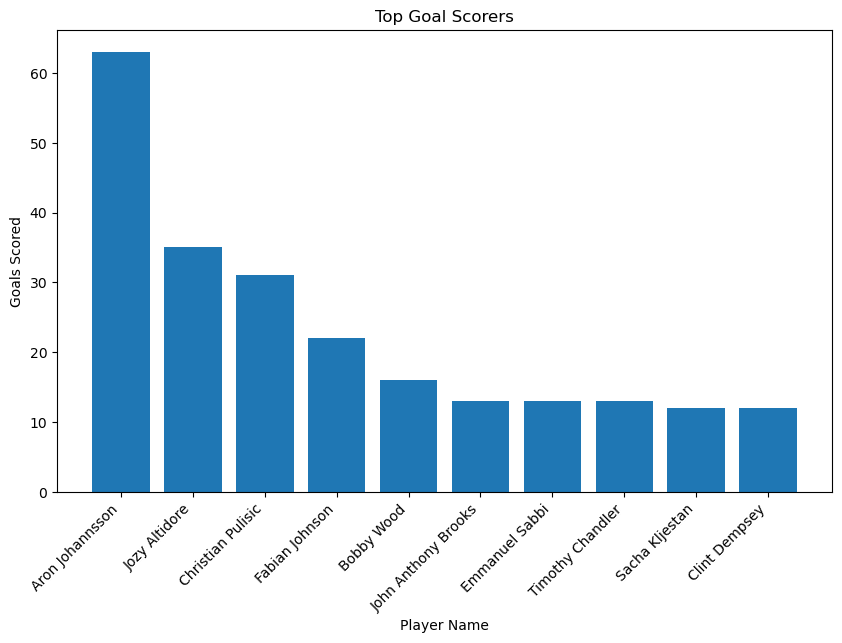

In [104]:
# Filter the dataset for goal-related events
goals_df = fc_df[fc_df['type'] == 'Goals']

# 1. Which players have scored the most goals?
player_goals = goals_df.groupby('name').size().reset_index(name='goal_count').sort_values(by='goal_count', ascending=False)
top_players = player_goals.head(10)  # Top 10 players with most goals

print(top_players)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_players['name'], top_players['goal_count'])
plt.xlabel('Player Name')
plt.ylabel('Goals Scored')
plt.title('Top Goal Scorers')
plt.xticks(rotation=45, ha='right')
plt.show()

# INTERPRETATION: The code investigates goal-scoring events in the performance analysis dataset (fc_df) and identifies the top 10 players by their goal
# count. Aron Johannsson leads the pack with 63 goals, followed by Jozy Altidore (35 goals) and Christian Pulisic (31 goals).


Top-performing teams:
 Borussia Dortmund                     601.0
Alkmaar Zaanstreek                    410.0
FC Schalke 04                         339.0
Everton Football Club                 296.0
Sportverein Werder Bremen von 1899    239.0
Tottenham Hotspur Football Club       237.0
Royal Sporting Club Anderlecht        236.0
Hertha BSC                            231.0
Stoke City                            219.0
Chelsea Football Club                 219.0
dtype: float64


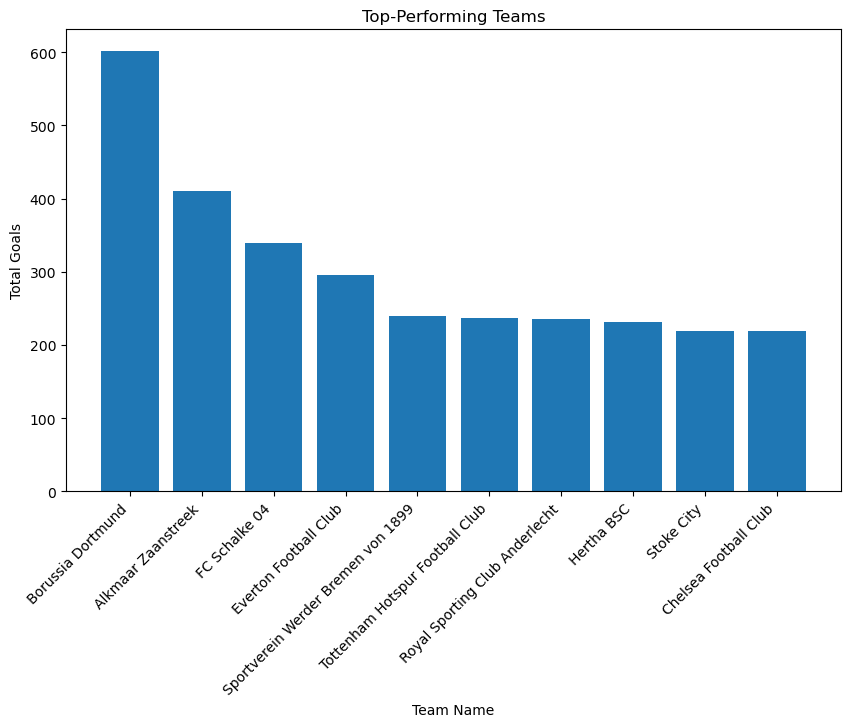

In [105]:
# 2. What are the top-performing teams in terms of goals scored?
top_teams = fc_df.groupby('home_club_name')['home_club_goals'].sum() + fc_df.groupby('away_club_name')['away_club_goals'].sum()
top_teams = top_teams.sort_values(ascending=False)
t10 = top_teams.head(10)

print("Top-performing teams:\n", t10)
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(t10.index, t10.values)
plt.xlabel('Team Name')
plt.ylabel('Total Goals')
plt.title('Top-Performing Teams')
plt.xticks(rotation=45, ha='right')
plt.show()

# INTERPRETATION: The code identifies teams with the highest overall goals scored in the dataset. 
# Borussia Dortmund leads the chart with 601 goals, followed by Alkmaar Zaanstreek (410 goals) and FC Schalke 04 (339 goals).

Home goals percentage: 55.648205038181345
Away goals percentage: 44.351794961818655


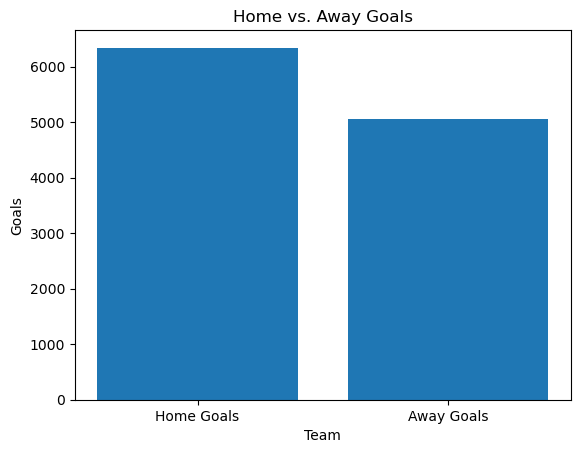

In [106]:
# 3. What is the distribution of goals between home and away teams?
home_goals = fc_df['home_club_goals'].sum()
away_goals = fc_df['away_club_goals'].sum()
total_goals = home_goals + away_goals
home_percentage = (home_goals / total_goals) * 100
away_percentage = (away_goals / total_goals) * 100
print("Home goals percentage:", home_percentage)
print("Away goals percentage:", away_percentage)



# Visualization
# Goal distribution
plt.bar(['Home Goals', 'Away Goals'], [home_goals, away_goals])
plt.xlabel('Team')
plt.ylabel('Goals')
plt.title('Home vs. Away Goals')
plt.show()

# INTERPRETATION: The code analyzes goal distribution between home and away teams. It reveals that home teams scored more goals,
# with a percentage of  55.64% compared to 44.35% for away teams.

Average goals by competition:
                 home_club_goals  away_club_goals  total_avg
competition_id                                             
BE1                    1.743802         1.297521   3.041322
BESC                   1.666667         0.666667   2.333333
CDR                    1.500000         2.000000   3.500000
CIT                    1.400000         1.200000   2.600000
CL                     1.586538         1.432692   3.019231
CLQ                    2.400000         1.533333   3.933333
DFB                    1.863636         2.609091   4.472727
DFL                    6.000000         7.000000  13.000000
DK1                    1.462617         1.352804   2.815421
DKP                    1.088235         2.470588   3.558824
EL                     1.864407         1.254237   3.118644
ELQ                    1.806452         1.290323   3.096774
ES1                    1.625000         1.875000   3.500000
FAC                    2.092593         1.092593   3.185185
FR1      

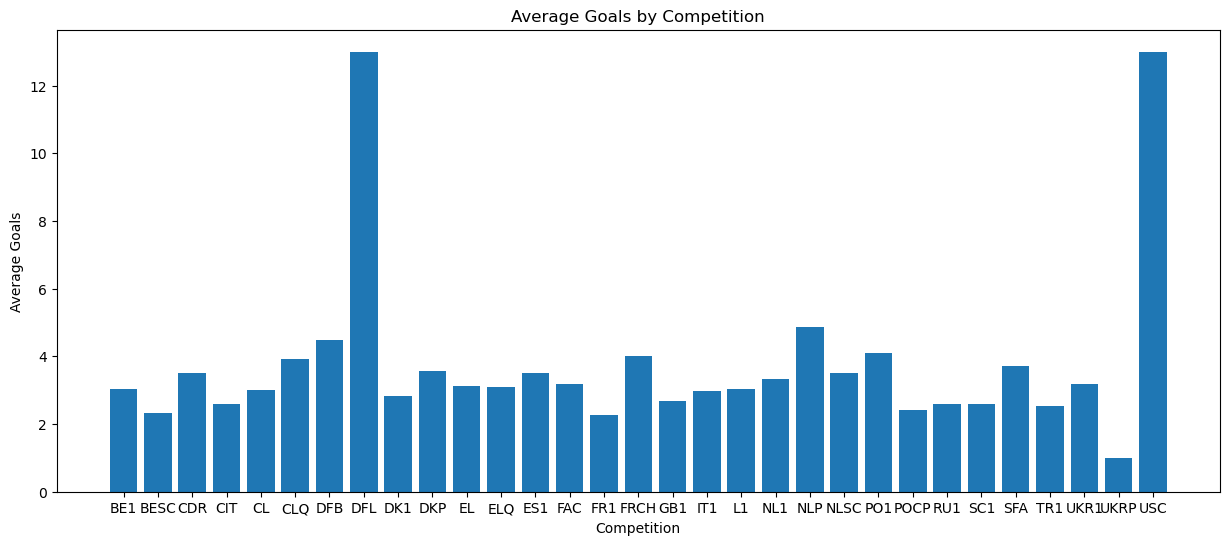

In [107]:
# 4. How does the average number of goals vary across different competitions?
average_goals_by_competition = fc_df.groupby('competition_id').agg({'home_club_goals': 'mean', 'away_club_goals': 'mean'})
average_goals_by_competition['total_avg'] = average_goals_by_competition['home_club_goals'] + average_goals_by_competition['away_club_goals']
print("Average goals by competition:\n", average_goals_by_competition)


# Average goals by competition
plt.figure(figsize=(15, 6))
plt.bar(average_goals_by_competition.index, average_goals_by_competition['total_avg'])
plt.xlabel('Competition')
plt.ylabel('Average Goals')
plt.title('Average Goals by Competition')
plt.show()

# INTERPRETATION : The code calculates the average goals scored (both home and away) for each competition in the dataset.
# The DFL and USC competition has the highest average goals at 13.00 per game, while UKRP competition has the lowest at 1.00.

**PROBABILITY**

1. What is the probability of a home team winning a match?

P(Home Win)= Number of Home Wins/ Total Number of Matches

In [108]:
# Define a home team win condition
home_wins = fc_df[fc_df['home_club_goals'] > fc_df['away_club_goals']]

# Calculate probability
prob_home_win = len(home_wins) / len(fc_df)
print('Probability of home team winning a match is:' , prob_home_win)

#INTERPRETATION: The output indicates that the probability of a home team winning a match is approximately 0.4502, or 45.02%.

Probability of home team winning a match is: 0.4502494092937779


2. What is the probability that a goal is scored after a substitution?

JOINT PROBABILITY: 
P(Goal after Substitution) = Number of Games with Substitution and Goal/ Total Number of Matches

In [109]:
# Filter events for goals and substitutions
substitutions = fc_df[fc_df['type'] == 'Substitutions']
goals = fc_df[fc_df['type'] == 'Goals']

# Merge to find if a goal was scored within 5 minutes after a substitution
merged_events = pd.merge_asof(substitutions.sort_values('minute'), goals.sort_values('minute'), on='minute', direction='forward', tolerance=5)

# Calculate probability
prob_goal_after_sub = len(merged_events) / len(fc_df)
print('Probability of a goal scored after a substiution is:',prob_goal_after_sub)

#INTERPRETATION: The code calculates the probability of a goal being scored after a substitution.The probability is calculated by dividing 
# the number of merged events by the total number of events.The output indicates that the probability of a goal scored after a substitution 
# is approximately 0.8438, or 84.38%.

Probability of a goal scored after a substiution is: 0.843791021265424


**Data Sampling, Central Limit Theorem and Normal Distribution**

1. What is the average number of goals scored by home teams, FOR A RANDOM SAMPLE ?

Step 1: Draw a Random Sample

In [110]:
import statistics as st

# Assume PA_df contains the PerformanceData
home_goals = fc_df['home_club_goals'].dropna()  # Remove any NaN values for home goals
away_goals = fc_df['away_club_goals'].dropna()
# Set a sample size (let's say 20 games)
sample_size = 20

# Take a random sample from home goals
sampleh = np.random.choice(home_goals, size=sample_size, replace=False)
samplea = np.random.choice(away_goals, size=sample_size, replace=False)

# Calculate the sample mean
sample_mean_h = np.mean(sampleh)
sample_mean_a = np.mean(samplea)

print(f'Sample Mean of Home Goals : {sample_mean_h}')
print(f'Sample Mean of Away Goals : {sample_mean_a}')

# INTERPRETATION: The code calculates the sample mean of home goals and away goals from a random sam   ple of 20 games.
# The sample mean of home goals is 1.65, and the sample mean of away goals is 1.15. 

Sample Mean of Home Goals : 1.35
Sample Mean of Away Goals : 1.3


Step 2: Central Limit Theorem and Normal Distribution - HYPOTHESIS TEST Question

2. Is the average number of goals scored in home games significantly different from the average number of goals scored in away games?

Using two-tailed test

Null Hypothesis (H₀): There is no significant difference between the average goals scored by home teams and away teams
Alternate Hypothesis (H₁): There is a significant difference between the average goals scored by home teams and away teams.

sample of home goals : [1, 0, 1, 2, 5, 3, 3, 4, 2, 2, 0, 3, 2, 1, 3, 1, 1, 1, 2, 3]
sample of away goals: [1, 1, 1, 1, 2, 3, 4, 1, 2, 4, 3, 1, 1, 1, 2, 1, 2, 1, 0, 1]

Sample Mean of Home Goals : 2.0
Sample Mean of Away Goals : 1.65
α=05 

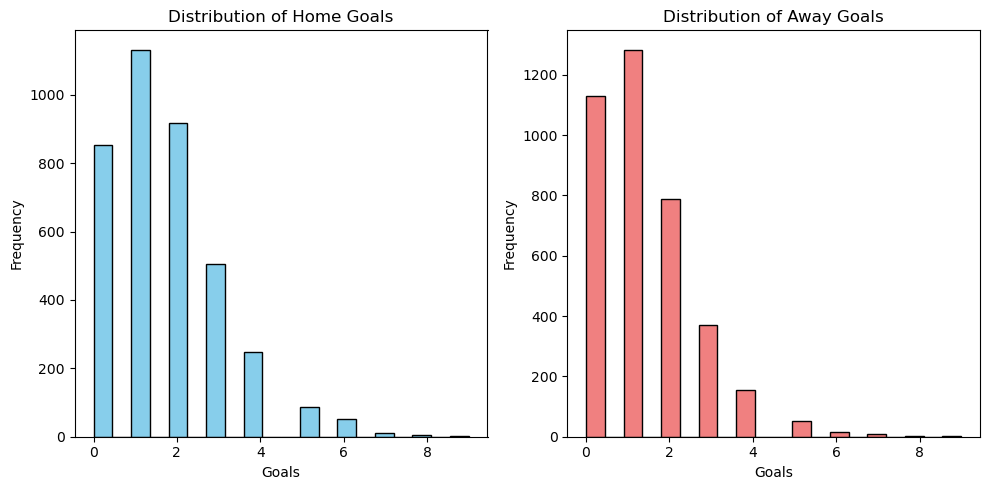

In [111]:
import matplotlib.pyplot as plt
from scipy import stats

# Extract goals scored by home and away teams
home_goals = fc_df['home_club_goals']
away_goals = fc_df['away_club_goals']

# a. Central Limit Theorem - Plot the distribution of home and away goals
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(home_goals, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Home Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(away_goals, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [112]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics as st
# Given sample data
home_goals = [1, 0, 1, 2, 5, 3, 3, 4, 2, 2, 0, 3, 2, 1, 3, 1, 1, 1, 2, 3]

away_goals = [1, 1, 1, 1, 2, 3, 4, 1, 2, 4, 3, 1, 1, 1, 2, 1, 2, 1, 0, 1]
alpha = 0.5

# Calculate the sample means
S_mean_home = 2.0
S_mean_away = 1.65

# Calculate the sample standard deviations
std_home = np.std(home_goals, ddof=1)
std_away = np.std(away_goals, ddof=1)

# Calculate the sample sizes
n_home = len(home_goals)
n_away = len(away_goals)

dof = n_home + n_away - 2

home_var=std_home**2
away_var=std_away**2


In [113]:
# Output results
print(f"Sample Mean (Home Goals): {S_mean_home}")
print(f"Sample Mean (Away Goals): {S_mean_away}")

print(f"Standard deviation (Home Goals): {std_home}")
print(f"Standard deviation (Away Goals): {std_away}")

print("Size of home_goals : " , n_home)
print("Size of away_goals :",n_away)

print("Variance of home_goals : ",home_var)
print("Variance of away_goals : ",away_var)

Sample Mean (Home Goals): 2.0
Sample Mean (Away Goals): 1.65
Standard deviation (Home Goals): 1.2977713690461004
Standard deviation (Away Goals): 1.0894228312566052
Size of home_goals :  20
Size of away_goals : 20
Variance of home_goals :  1.6842105263157896
Variance of away_goals :  1.1868421052631577


In [114]:
import math
from scipy.stats import t

num=abs(S_mean_home-S_mean_away)

denom=math.sqrt(home_var*(n_home-1)+away_var*(n_away-1))* math.sqrt((1/n_home)+(1/n_away))

tstats=num/denom
print("T Statistics: ", tstats)

tcritical=t.ppf(alpha/2,dof)
print("T Critical: ",tcritical)

p_val=t.sf(abs(tstats),dof)*2
print("P Value :",p_val)

T Statistics:  0.14985480293104797
T Critical:  -0.6810008783354652
P Value : 0.881671738163025


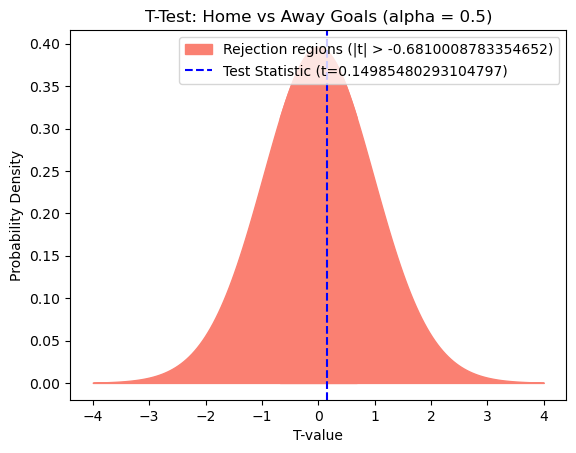

In [115]:
# Shade the rejection regions
x_reject = np.linspace(tcritical, 4, 100)
y_reject = stats.t.pdf(x_reject, dof)
plt.fill_between(x_reject, y_reject, 0, color='salmon', label='Rejection regions (|t| > {})'.format(tcritical))
x_reject = np.linspace(-4, -tcritical, 100)
y_reject = stats.t.pdf(x_reject, dof)
plt.fill_between(x_reject, y_reject, 0, color='salmon')

# Plot the test statistic
plt.axvline(tstats, color='blue', linestyle='--', label='Test Statistic (t={})'.format(tstats))

# Set plot labels and title
plt.xlabel('T-value')
plt.ylabel('Probability Density')
plt.title('T-Test: Home vs Away Goals (alpha = {})'.format(alpha))
plt.legend()
plt.show()


Plot Interpretation :
The red-shaded areas represent the rejection regions (when |t| > 0.68), which means if the t-statistic falls into these areas, we would reject the null hypothesis.
The blue vertical line at t = 0.15 represents the test statistic. It is very close to the center of the distribution, well within the acceptance region (between -0.68 and +0.68).


In [116]:
# Interpretation
if p_val<0.5:
    print("Reject the null hypothesis: There is a significant difference between home and away goals.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between home and away goals.")

Fail to reject the null hypothesis: There is no significant difference between home and away goals.


Conclusion:
Fail to reject the null hypothesis: Since the test statistic (t = 0.15) is far from the critical values and lies within the acceptance region, and the p-value (0.88) is much greater than the significance level (alpha = 0.1), we fail to reject the null hypothesis.

In [117]:
#INTERPRETATION: 

#1. The analysis outputs a p-value of 0.88, which is greater than the significance level (alpha) of 0.05. Since the p-value is greater than alpha, 
# we fail to reject the null hypothesis. 

#2. The t-test statistic (tstats) is 0.1498, and the critical t-value (tcritical) is -0.6810. The t-statistic falls within 
# the non-rejection region of the t-distribution,further supporting the conclusion from the p-value.


INTERPRETATIONS: SPRINT 3

1. Probability of Home Team Wins:
Interpretation: The probability of a home team winning a match is approximately 45.02%. This indicates that in a large number of matches, home teams are expected to win roughly 45 out of every 100 matches played. While this shows a slight home advantage, it is not statistically overwhelming, suggesting that factors other than home advantage (e.g., GOALS, ASSISTS, player conditions,ETC...) play a significant role in match outcomes.

3. Probability of Goals After Substitutions:
Interpretation: The probability of a goal being scored after a substitution is approximately 84.38%. This high probability implies that in matches where substitutions occur, there is an approximately 84 out of 100 chance that a goal will be scored afterward. This suggests a strong correlation between the act of substituting players and the likelihood of scoring, indicating that managers’ strategic decisions to substitute players effectively influence match outcomes.

5. Average Goals Scored by Home Teams vs. Away Teams:
Interpretation: The t-test yields a p-value of 0.88, indicating that there is no statistically significant difference between the average goals scored by home teams (mean = 2.0) and away teams (mean = 1.65). Since the p-value is well above the common significance level of 0.05, we fail to reject the null hypothesis. This means that any observed difference (a difference of 0.35 goals per match) is likely a result of random sampling variability rather than a true underlying difference in performance between home and away teams.

SPRINT 4

PART -1 : Two business questions related to Logistic Regression for Classification for Performance Analysis:

1. Can we predict whether a player will score a goal in a match based on their performance metrics?

2. Can we classify whether a team will win, lose, or draw a match based on team performance metrics?

In [118]:
# 1. Can we predict whether a player will score a goal in a match based on their performance metrics?

#importing libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder


import warnings
warnings.simplefilter(action='ignore')

In [119]:
# shape of the dataset
print('The number of samples in data is {}.'.format(fc_df.shape[0]))

The number of samples in data is 3809.


In [120]:
fc_df.describe()

,game_id,player_id,date,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,...,away_club_position,attendance,last_season,current_club_id,date_of_birth,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,minute
count,3.809000e+03,3809.000000,3809,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,...,3809.000000,3809.000000,3809.000000,3809.000000,3809,3809.000000,3.809000e+03,3.809000e+03,3809,3809.000000
mean,2.685929e+06,155510.819638,2016-05-12 05:04:19.910737920,0.135994,0.003150,0.148333,0.075873,70.766868,2015.396430,1.664479,...,9.495406,29570.137569,2018.639275,794.836177,1990-11-04 19:27:48.154371200,184.148070,3.302022e+06,8.884655e+06,2025-05-04 10:07:09.088999936,66.040693
min,2.219794e+06,1321.000000,2012-07-13 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,0.000000,...,1.000000,300.000000,2012.000000,5.000000,1971-05-18 00:00:00,162.000000,1.000000e+05,5.000000e+04,2023-11-30 00:00:00,-1.000000
25%,2.332041e+06,39378.000000,2013-12-03 00:00:00,0.000000,0.000000,0.000000,0.000000,58.000000,2013.000000,1.000000,...,6.000000,14675.000000,2016.000000,38.000000,1987-04-29 00:00:00,180.000000,7.000000e+05,2.800000e+06,2024-06-30 00:00:00,68.000000
50%,2.668508e+06,119169.000000,2016-05-16 00:00:00,0.000000,0.000000,0.000000,0.000000,90.000000,2015.000000,1.000000,...,9.000000,26788.000000,2018.000000,289.000000,1990-05-12 00:00:00,184.000000,1.000000e+06,5.000000e+06,2025-06-30 00:00:00,68.000000
75%,3.050524e+06,255916.000000,2018-09-22 00:00:00,0.000000,0.000000,0.000000,0.000000,90.000000,2018.000000,2.000000,...,13.000000,42146.000000,2023.000000,703.000000,1995-06-09 00:00:00,190.000000,1.500000e+06,9.000000e+06,2025-06-30 00:00:00,68.000000
max,3.451629e+06,605498.000000,2020-09-27 00:00:00,2.000000,1.000000,4.000000,2.000000,120.000000,2020.000000,9.000000,...,21.000000,81365.000000,2023.000000,19657.000000,2002-11-13 00:00:00,195.000000,2.500000e+07,6.000000e+07,2028-06-30 00:00:00,105.000000
std,3.574539e+05,141100.353770,NaN,0.352644,0.056048,0.447681,0.274566,29.774410,2.509927,1.426159,...,4.900645,19406.547199,3.478564,1794.312213,NaN,6.246101,6.469142e+06,1.290312e+07,NaN,13.473136


In [121]:
#checking for missing values 
fc_df.isnull().sum()

appearance_id                  0
game_id                        0
player_id                      0
date                           0
player_name                    0
competition_id                 0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

In [122]:
# Read new data to predict using model
df_new= pd.read_excel('test data.xlsx')
#df_new=df_new.iloc[:,2:]
df_new

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [123]:
df_new.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

In [124]:
# Rename a column
df_new.rename(columns={'position_x':'position','type_y':'type'}, inplace=True)

In [125]:
df_new.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

Goal Prediction Model - Accuracy: 0.8722659667541557, Precision: 0.0, Recall: 0.0


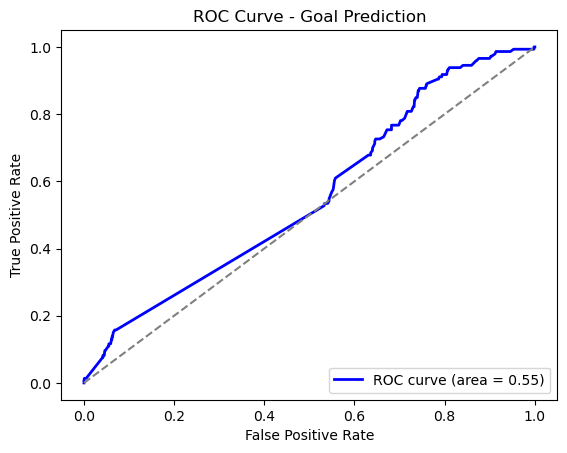

In [126]:
# Selecting relevant columns for the goal prediction model
goal_data = fc_df[['minutes_played', 'yellow_cards', 'red_cards', 'assists', 'goals']]

# Create target variable 'goal_scored' (1 if goals > 0, else 0)
goal_data['goal_scored'] = (goal_data['goals'] > 0).astype(int)

# Split data into features and target variable
X_goal = goal_data[['minutes_played', 'yellow_cards', 'red_cards', 'assists']]
y_goal = goal_data['goal_scored']

# Split into training and test sets
X_train_goal, X_test_goal, y_train_goal, y_test_goal = train_test_split(X_goal, y_goal, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_goal = scaler.fit_transform(X_train_goal)
X_test_goal = scaler.transform(X_test_goal)

# Initialize and train logistic regression model
model_goal = LogisticRegression()
model_goal.fit(X_train_goal, y_train_goal)

# Predict on test data
y_pred_goal = model_goal.predict(X_test_goal)

# Evaluate model
accuracy_goal = accuracy_score(y_test_goal, y_pred_goal)
precision_goal = precision_score(y_test_goal, y_pred_goal)
recall_goal = recall_score(y_test_goal, y_pred_goal)

print(f"Goal Prediction Model - Accuracy: {accuracy_goal}, Precision: {precision_goal}, Recall: {recall_goal}")

# Plot ROC Curve
y_prob_goal = model_goal.predict_proba(X_test_goal)[:, 1]
fpr_goal, tpr_goal, _ = roc_curve(y_test_goal, y_prob_goal)
roc_auc_goal = auc(fpr_goal, tpr_goal)

plt.figure()
plt.plot(fpr_goal, tpr_goal, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_goal:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Goal Prediction')
plt.legend(loc="lower right")
plt.show()


# INTERPRETATION: The ROC curve for the goal prediction model shows an area under the curve (AUC) of 0.55, indicating poor discriminatory
# power as it is only slightly better than random guessing (AUC = 0.5). Despite a high accuracy of 87.2%, the precision and recall are both 0, 
# suggesting the model fails to correctly predict goals, possibly due to class imbalance.


Match Outcome Model - Accuracy: 0.5511811023622047


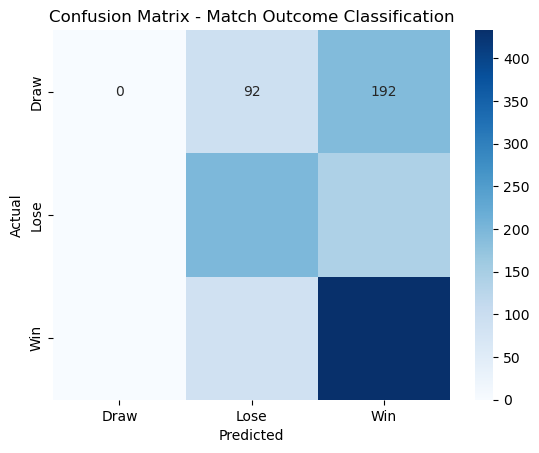

In [127]:
# 2: Classify match outcome as win, lose, or draw 

# Creating a new target for the match outcome
fc_df['match_result'] = np.where(fc_df['home_club_goals'] > fc_df['away_club_goals'], 'Win',
                                np.where(fc_df['home_club_goals'] < fc_df['away_club_goals'], 'Lose', 'Draw'))

# Select relevant team performance features
outcome_data = fc_df[['home_club_position', 'away_club_position', 'attendance', 'match_result']]

# Encode categorical target variable 'match_result'
le = LabelEncoder()
outcome_data['match_result_encoded'] = le.fit_transform(outcome_data['match_result'])

# Split data into features and target variable
X_outcome = outcome_data[['home_club_position', 'away_club_position', 'attendance']]
y_outcome = outcome_data['match_result_encoded']

# Split into training and test sets
X_train_outcome, X_test_outcome, y_train_outcome, y_test_outcome = train_test_split(X_outcome, y_outcome, test_size=0.3, random_state=42)

# Scale features
X_train_outcome = scaler.fit_transform(X_train_outcome)
X_test_outcome = scaler.transform(X_test_outcome)

# Initialize and train multinomial logistic regression model
model_outcome = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_outcome.fit(X_train_outcome, y_train_outcome)

# Predict on test data
y_pred_outcome = model_outcome.predict(X_test_outcome)

# Evaluate model
accuracy_outcome = accuracy_score(y_test_outcome, y_pred_outcome)
print(f"Match Outcome Model - Accuracy: {accuracy_outcome}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_outcome, y_pred_outcome)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Match Outcome Classification')
plt.show()

#INTERPRETATION : The confusion matrix for the match outcome classification model shows that the model struggles with predicting "Draw" outcomes,
# as it never predicts them correctly. The accuracy of the model is 55%, with a tendency to misclassify draws and lose outcomes as wins,
# indicating the model needs improvement in differentiating between match outcomes.

In [128]:
# Predictions for test data for both questions

test_data_player_features = df_new[['minutes_played', 'yellow_cards', 'red_cards', 'assists']]
test_data_team_features = df_new[['home_club_position', 'away_club_position', 'attendance']]

player_score_prediction = model_goal.predict(test_data_player_features)
team_result_prediction = model_outcome.predict(test_data_team_features)

print("Player Goal Prediction on Test Data:", "Goal" if player_score_prediction[0] == 1 else "No Goal")
print("Team Result Prediction on Test Data:", team_result_prediction[0])

Player Goal Prediction on Test Data: Goal
Team Result Prediction on Test Data: 2


OVERALL INTERPRETATION SPRINT 4 - PART 1 :

Goal Prediction: Despite an overall accuracy of 87.2%, the model's ROC AUC of 0.55 indicates weak performance in distinguishing between goal-scoring and non-goal-scoring instances. The precision and recall scores of 0 reveal that the model fails to predict true positives, likely due to an imbalanced dataset where the number of goals scored is significantly lower than non-goal events. This calls for balancing techniques or feature engineering to improve its effectiveness.

Match Outcome Classification: The confusion matrix reveals that the model is reasonably accurate (55%) at predicting wins but struggles significantly in predicting draws, as these are often misclassified as either wins or losses. The low accuracy and misclassifications indicate that the model may not fully capture the underlying factors differentiating match outcomes, possibly requiring more sophisticated feature selection or a different modeling approach to better handle the nuances of the dataset.

Overall, both models show moderate to low performance, with clear issues in classifying key outcomes, suggesting a need for further refinement, feature tuning, and possibly handling class imbalance to improve predictions.

PART -2 : Player Profile and Market Value

DESCRIPTIVE ANALYSIS : (Used Tableau and Python)

1. What is the distribution of players' market values across different teams?
2. Which players have the highest market value in each position?
3. How has the market value of players evolved over the seasons?
4. What is the relationship between a player’s performance metrics (goals, assists) and their market value?


DESCRIPTIVE ANALYSIS :

1. What is the distribution of players' market values across different teams?

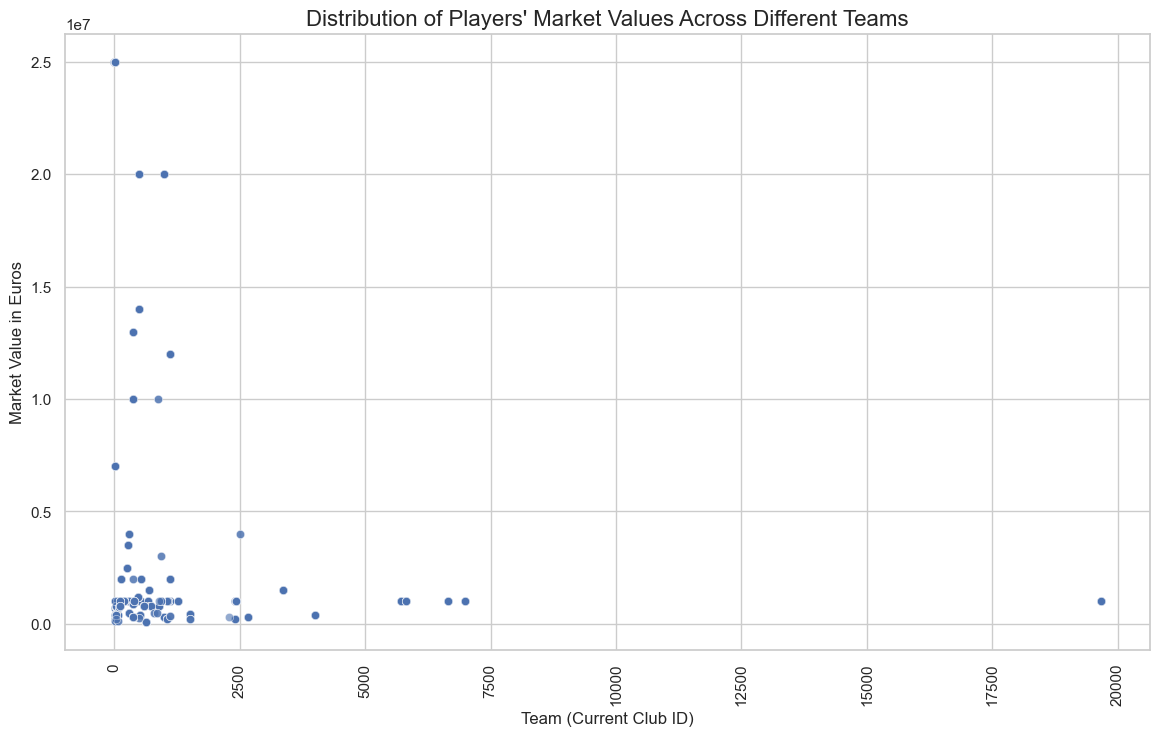

In [129]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plot for players' market values across different teams
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=fc_df, x='current_club_id', y='market_value_in_eur', alpha=0.6)
scatter_plot.set_title('Distribution of Players\' Market Values Across Different Teams', fontsize=16)
scatter_plot.set_xlabel('Team (Current Club ID)', fontsize=12)
scatter_plot.set_ylabel('Market Value in Euros', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#INTERPRETATION: This plot shows the distribution of players market value for teams. 

2. Which players have the highest market value in each position?

       position             player_name  market_value_in_eur
19       Attack       Christian Pulisic           25000000.0
51       Attack            Josh Sargent           12000000.0
49       Attack                  Jordan            7000000.0
15       Attack          Charlie Davies            1000000.0
21       Attack           Clint Dempsey            1000000.0
106    Defender  Cameron Carter-Vickers           13000000.0
109    Defender          Chris Richards           10000000.0
169    Defender            Sergino Dest           10000000.0
164    Defender           Reggie Cannon            4000000.0
124    Defender       Erik Palmer-Brown            2500000.0
275  Goalkeeper            Zack Steffen            3500000.0
217  Goalkeeper           Ethan Horvath            1500000.0
192  Goalkeeper            Brad Friedel            1000000.0
196  Goalkeeper  Caleb Patterson-Sewell            1000000.0
208  Goalkeeper          David Yelldell            1000000.0
315    Midfield         

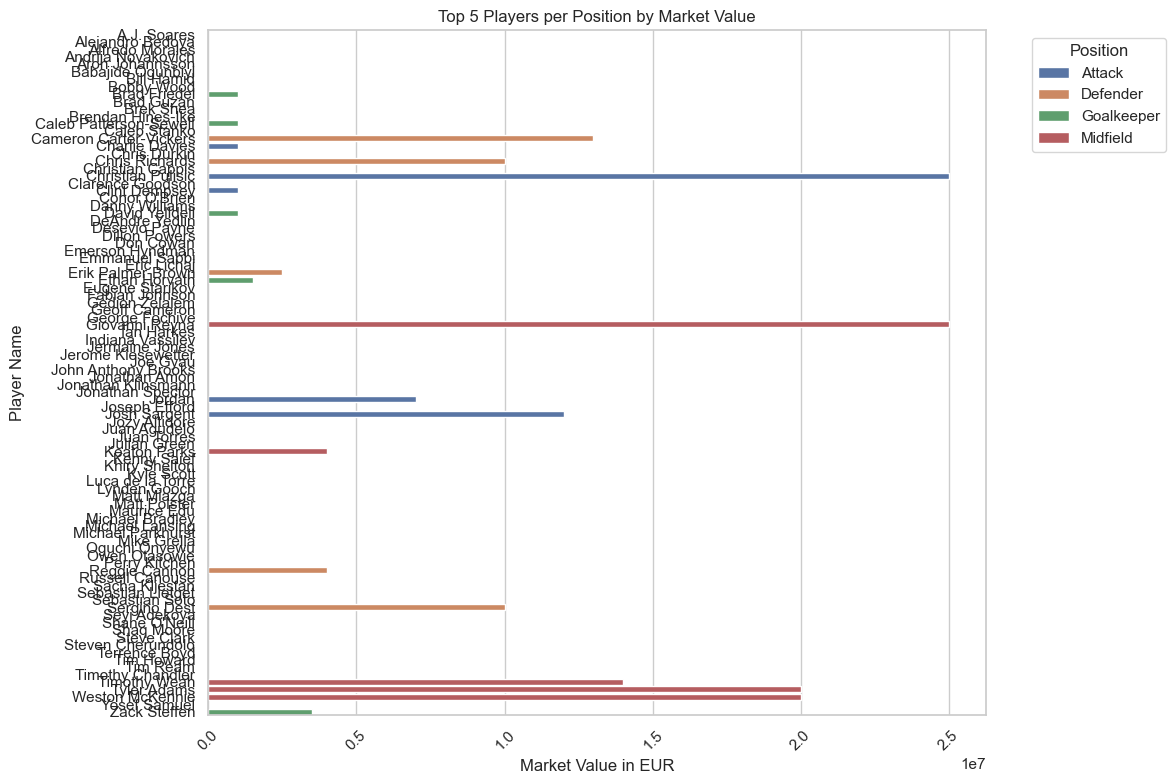

In [130]:
# Group by position and get the top 5 players with the highest market value
top_5_per_position = (fc_df.groupby(['position', 'player_name'])['market_value_in_eur']
                      .max()
                      .reset_index()
                      .sort_values(['position', 'market_value_in_eur'], ascending=[True, False])
                     )

# Get the top 5 players per position
top_5_per_position = top_5_per_position.groupby('position').head(5)

print(top_5_per_position)


# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot using seaborn's barplot
sns.barplot(x='market_value_in_eur', y='player_name', hue='position', data=top_5_per_position,dodge=False)

# Set plot labels and title
plt.xlabel('Market Value in EUR')
plt.ylabel('Player Name')
plt.title('Top 5 Players per Position by Market Value')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the legend outside of the plot
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

#INTERPRETATION: The analysis reveals the top five players with the highest market values for each position, highlighting 
# that Christian Pulisic(attack) and Giovanni Reyna(midfeild) lead their respective categories at €25 million. This indicates significant variations 
# in market value across positions, with attackers and midfielders commanding higher valuations compared to defenders and goalkeepers.

3. How has the market value of players evolved over the seasons?

   season  market_value_in_eur
0    2012         8.130194e+05
1    2013         7.563508e+05
2    2014         8.271429e+05
3    2015         2.161111e+06
4    2016         3.408639e+06
5    2017         5.448718e+06
6    2018         5.383631e+06
7    2019         7.845073e+06
8    2020         5.924219e+06


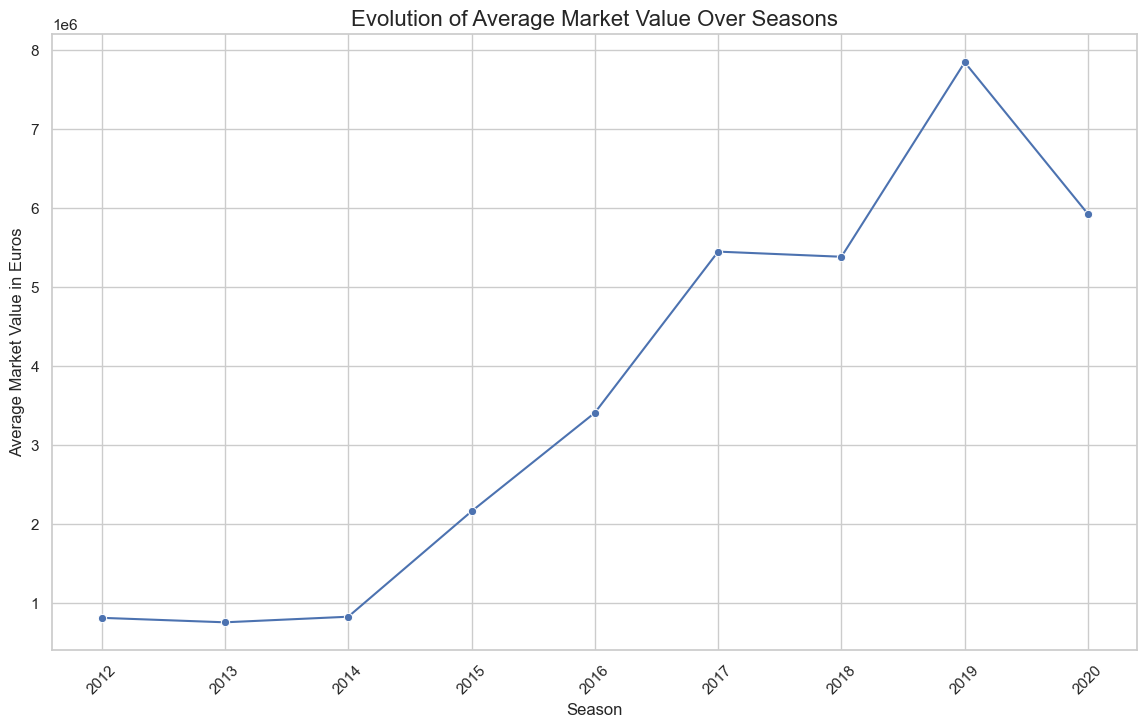

In [131]:
# Group by season and calculate the average market value
market_value_evolution = fc_df.groupby('season')['market_value_in_eur'].mean().reset_index()
print(market_value_evolution)


# Line plot for market value evolution over seasons
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(data=market_value_evolution, x='season', y='market_value_in_eur', marker='o')
line_plot.set_title('Evolution of Average Market Value Over Seasons', fontsize=16)
line_plot.set_xlabel('Season', fontsize=12)
line_plot.set_ylabel('Average Market Value in Euros', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#INTERPRETATION: The analysis shows that the average market value of players has significantly increased
# from approximately €813,019 in 2012 to a peak of €7,845,073 in 2019, indicating a slight strong upward trend in player valuations
# over the seasons. However, there was a slight decline in average market value to €5,924,219 in 2020, suggesting potential market fluctuations
# or economic factors impacting valuations.

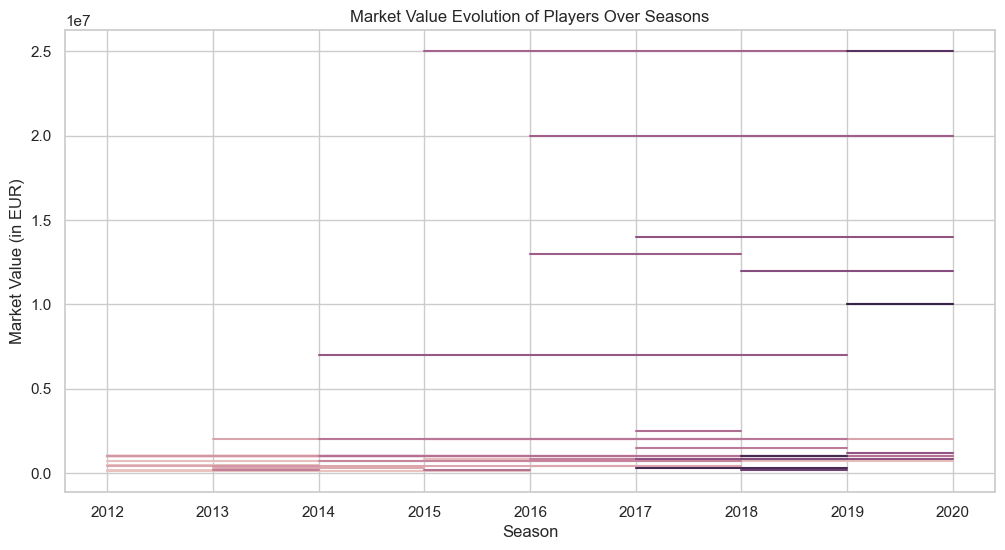

In [132]:
# Group by player and season to get average market value per season
market_value_over_time = fc_df.groupby(['player_id', 'season']).agg({'market_value_in_eur': 'mean'}).reset_index()

# Line plot for market value evolution over seasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=market_value_over_time, x='season', y='market_value_in_eur', hue='player_id', legend=None)
plt.title("Market Value Evolution of Players Over Seasons")
plt.xlabel("Season")
plt.ylabel("Market Value (in EUR)")
plt.show()

4. What is the relationship between a player’s performance metrics (goals, assists) and their market value?

In [133]:
performance_metrics = fc_df[['market_value_in_eur', 'goals', 'assists','yellow_cards', 'red_cards','minutes_played']] 

correlation = performance_metrics.corr()
print(correlation['market_value_in_eur']) 

market_value_in_eur    1.000000
goals                  0.022801
assists                0.079115
yellow_cards          -0.040484
red_cards             -0.021528
minutes_played        -0.132414
Name: market_value_in_eur, dtype: float64


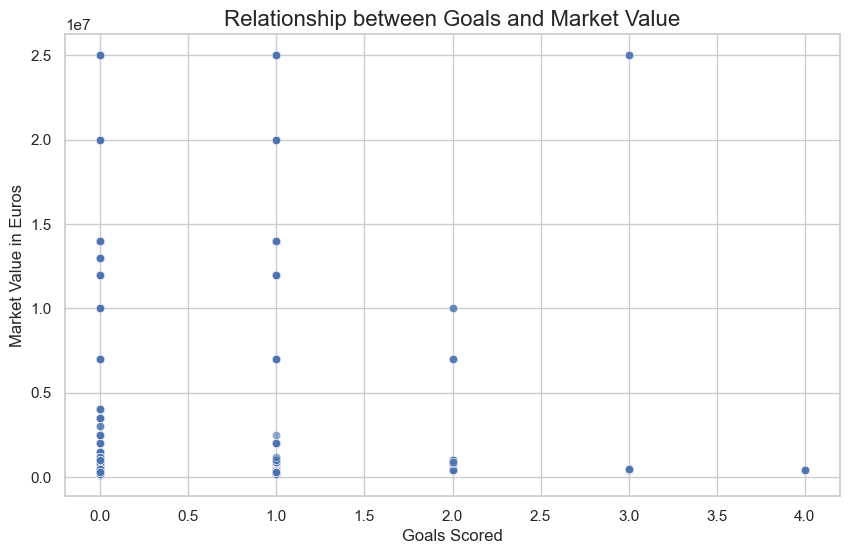

In [134]:
# Scatter plot to visualize relationship between goals and market value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=performance_metrics, x='goals', y='market_value_in_eur', alpha=0.6)
plt.title('Relationship between Goals and Market Value', fontsize=16)
plt.xlabel('Goals Scored', fontsize=12)
plt.ylabel('Market Value in Euros', fontsize=12)
plt.grid(True)
plt.show()

#INTERPRETATION: The correlation analysis reveals a weak positive relationship between a player’s market value and their goals (0.023) and assists (0.079),
# indicating that these performance metrics have minimal impact on market valuation.

OVERALL INTERPRETATION PART 2 : 

Market Value Comparisons Across Positions: 
   The analysis of market values shows that top players in attacking and midfield positions, like Christian Pulisic and Giovanni Reyna with values of €25 million, significantly outpace defenders and goalkeepers. This indicates that attacking roles are generally perceived as more valuable in the market, reflecting the premium placed on goal-scoring potential.

Evolution of Player Market Values:
   The average market value of players has risen dramatically from approximately €813,019 in 2012 to a peak of €7,845,073 in 2019, followed by a decrease to €5,924,219 in 2020. This upward trend suggests a growing investment in player talent, although the subsequent decline may signal market corrections or economic influences impacting valuations.

Relationship Between Performance Metrics and Market Value:
   The correlation coefficients between market value and performance metrics are relatively low, with goals at 0.022 and assists at 0.079, suggesting minimal influence on market valuation. This indicates that while performance metrics are important, they are not the sole determinants of market value, and other factors such as market dynamics, player popularity, and potential may also play significant roles.

In [135]:
# INTERPRETATIONS SPRINT 4

SPRINT 5

SIMPLE LINEAR REGRESSION QUESTION: 

1. Can a player’s performance (goals, assists, minutes played) predict their market value?

**IMPORTING LIBRARIES**

In [136]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

**DATASET**

In [137]:
# USING PLAYER PROFILE AND MARKET VALUE DATASET

fc_df.head()

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,minute,type,match_result
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,68.0,Substitutions,Draw
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,74.0,Substitutions,Lose
2,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,73.0,Substitutions,Draw
3,2244352_119169,2244352,119169,2012-07-26,Aron Johannsson,ELQ,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,43.0,Substitutions,Win
4,2224567_119169,2224567,119169,2012-07-29,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,56.0,Substitutions,Win


**VARIABLES**

DEPENDENT VARIABLE: Market Value (in EUR)

INDEPENDENT VARIABLE: Goals, Assists, Minutes Played

**DATA PREPARATION**

In [138]:
# CHECKING FOR MISSING VALUES

fc_df.isnull().sum()

appearance_id                  0
game_id                        0
player_id                      0
date                           0
player_name                    0
competition_id                 0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

**DATA SCALING**

In [139]:
# THIS NEW DATA IS TO TEST THE CREATED MODEL: PULL OUT ONLY THE REQUIRED COLUMNS 
df_new = pd.read_excel('test data.xlsx')
df_new


,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [140]:
df_new.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

In [141]:
df_model = df_new[['goals', 'assists', 'minutes_played', 'market_value_in_eur']]
df_model

,goals,assists,minutes_played,market_value_in_eur
0,0,0,58,3000000
1,0,0,58,3000000


In [142]:
fc_d = fc_df[['goals', 'assists', 'minutes_played', 'market_value_in_eur']]
fc_d.head()

,goals,assists,minutes_played,market_value_in_eur
0,0,0,90,400000
1,0,0,74,400000
2,0,0,73,400000
3,0,0,43,400000
4,0,0,56,400000


In [143]:
# Append the new row to the original DataFrame

n_data=pd.concat([fc_d,df_model])
n_data

,goals,assists,minutes_played,market_value_in_eur
0,0,0,90,400000
1,0,0,74,400000
2,0,0,73,400000
3,0,0,43,400000
4,0,0,56,400000
...,...,...,...,...
3806,0,0,58,3000000
3807,0,0,90,4000000
3808,0,0,90,4000000
0,0,0,58,3000000


In [144]:
# Standardizing data together

cols= n_data.columns
scaler= StandardScaler()
s= scaler.fit_transform(n_data)
df_s= pd.DataFrame(s,columns=cols)
df_s

,goals,assists,minutes_played,market_value_in_eur
0,-0.331283,-0.276295,0.646410,-0.448746
1,-0.331283,-0.276295,0.108850,-0.448746
2,-0.331283,-0.276295,0.075253,-0.448746
3,-0.331283,-0.276295,-0.932672,-0.448746
4,-0.331283,-0.276295,-0.495905,-0.448746
...,...,...,...,...
3806,-0.331283,-0.276295,-0.428710,-0.046680
3807,-0.331283,-0.276295,0.646410,0.107960
3808,-0.331283,-0.276295,0.646410,0.107960
3809,-0.331283,-0.276295,-0.428710,-0.046680


In [145]:
# EXTRACT THE TEST DATA FROM ORIGINAL DATA 

# Extract the rows 3809 and 3810 from the dataframe for columns 'goals' to 'market_value_in_eur'
validation = df_s.loc[3808:3809, 'goals':'market_value_in_eur']

# Reshape the extracted rows into a DataFrame (optional if needed for a single row)
n_data_df = validation.reset_index(drop=True)  # Reset the index to avoid the original row indices

In [146]:
n_data_df

,goals,assists,minutes_played,market_value_in_eur
0,-0.331283,-0.276295,0.64641,0.10796
1,-0.331283,-0.276295,-0.42871,-0.04668


In [147]:
# Retrieve original data by excluding new data
df_s= df_s.iloc[:-2]
df_s

,goals,assists,minutes_played,market_value_in_eur
0,-0.331283,-0.276295,0.646410,-0.448746
1,-0.331283,-0.276295,0.108850,-0.448746
2,-0.331283,-0.276295,0.075253,-0.448746
3,-0.331283,-0.276295,-0.932672,-0.448746
4,-0.331283,-0.276295,-0.495905,-0.448746
...,...,...,...,...
3804,1.903267,-0.276295,0.209643,-0.464210
3805,-0.331283,3.367171,-1.470232,-0.046680
3806,-0.331283,-0.276295,-0.428710,-0.046680
3807,-0.331283,-0.276295,0.646410,0.107960


**FEATURE SELECTION**

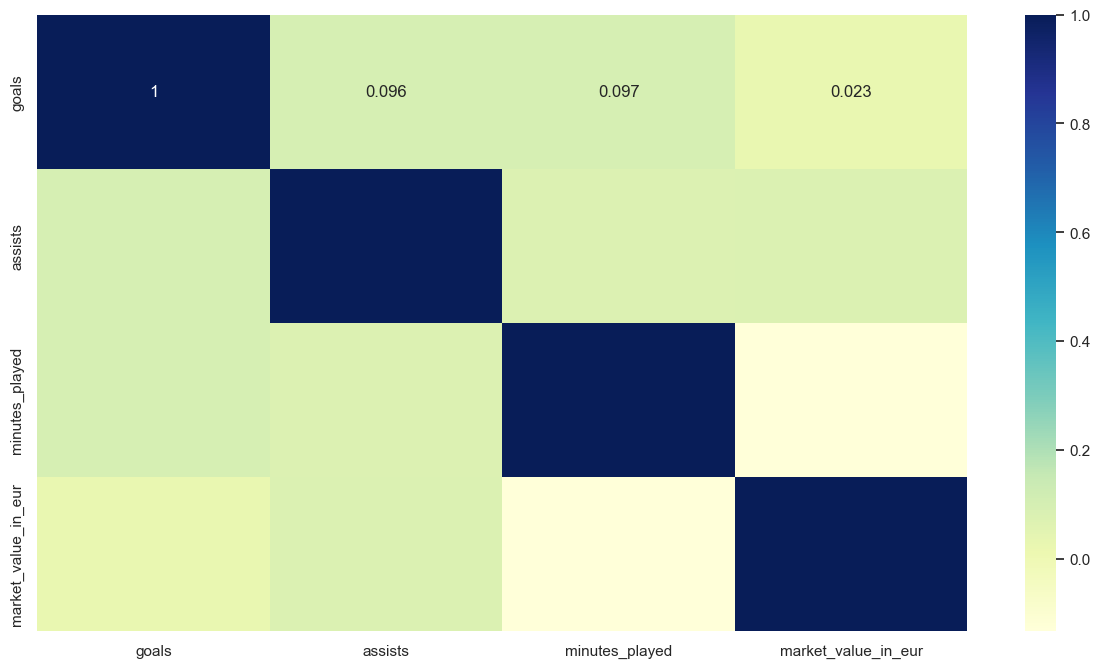

In [148]:
# Plotting heatmap

fig, ax= plt.subplots(1,1, figsize=(15,8))
ax= sns.heatmap(df_s.corr(), annot=True, cmap="YlGnBu")

In [149]:
# To show the correlation values from most negatively correlated to the most positively correlated.
df_s.corr()['market_value_in_eur']

goals                  0.022801
assists                0.079115
minutes_played        -0.132414
market_value_in_eur    1.000000
Name: market_value_in_eur, dtype: float64

In [150]:
df_s.corr()['market_value_in_eur']<0.6

goals                   True
assists                 True
minutes_played          True
market_value_in_eur    False
Name: market_value_in_eur, dtype: bool

In [151]:
# Feature selection based on correlation
columns_to_drop= ['goals','minutes_played'] 
df= df_s.drop(columns_to_drop,axis=1)
df

,assists,market_value_in_eur
0,-0.276295,-0.448746
1,-0.276295,-0.448746
2,-0.276295,-0.448746
3,-0.276295,-0.448746
4,-0.276295,-0.448746
...,...,...
3804,-0.276295,-0.464210
3805,3.367171,-0.046680
3806,-0.276295,-0.046680
3807,-0.276295,0.107960


**VISUALIZATION OF SELECTED FEATURE**

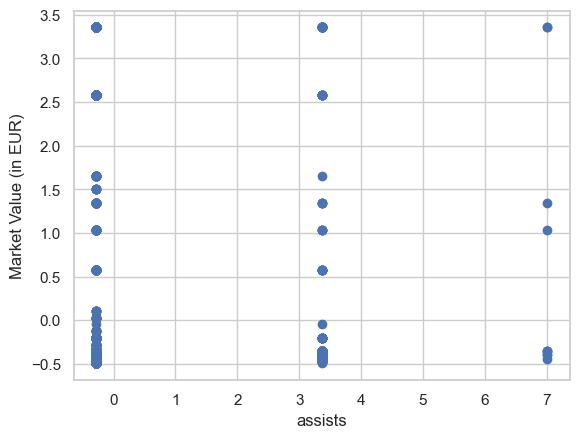

In [152]:
fig,ax= plt.subplots()  #there is a clear uppward trend inthe scatter plot
plt.scatter(df['assists'],df['market_value_in_eur'])
plt.xlabel('assists')
plt.ylabel('Market Value (in EUR)')
plt.show()

**SPLITING OF DATA**

In [153]:
X_gr= df['assists'].values.reshape((-1,1))
y= df['market_value_in_eur'].values

In [154]:
# Build model and fit with data
X_train, X_test, y_train, y_test= train_test_split(X_gr,y, test_size= 0.3, random_state=0)
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [155]:
model.score(X_train, y_train)

0.006895145737302877

In [156]:
# print intercept and slope of the model
print(model.intercept_)
print(model.coef_)

0.0017741054881919547
[0.08344275]


In [157]:
# Predict the model using test data
y_pred_test= model.predict( X_test)
y_pred_test

array([-0.02128075, -0.02128075, -0.02128075, ..., -0.02128075,
       -0.02128075, -0.02128075])

In [158]:
# Evaluate MSE, MAE, RMSE
mse= mean_squared_error(y_test,y_pred_test) # average of square of errors
mae= mean_absolute_error(y_test,y_pred_test) # average of errors
rmse= mse**0.5 # square root of mse

print(" Mean Squared Error: ", mse)
print(" Mean Absolute Error: ", mae)
print(" Root Mean Squared Error: ", rmse)

 Mean Squared Error:  0.9858132438605239
 Mean Absolute Error:  0.633905603616688
 Root Mean Squared Error:  0.9928812838705965


In [159]:
# Evaluate R2 Score

r2= r2_score(y_test,y_pred_test) # and r2 is close to positive 1 - it means the model is created predicts the data well
r2

0.00466019917824978

**PREDICTING NEW TEST DATA**

In [160]:
# Reshape the new data into a 2D array for prediction
input_new=n_data_df['assists'].values.reshape((-1,1)) # ml is trained to accept only in a 2d array format only

In [161]:
input_new

array([[-0.27629543],
       [-0.27629543]])

In [162]:
# Predict the target value for the new data
predicted= model.predict(input_new)

# Print the predicted value
predicted

array([-0.02128075, -0.02128075])

In [163]:
n_data_df

,goals,assists,minutes_played,market_value_in_eur
0,-0.331283,-0.276295,0.64641,0.10796
1,-0.331283,-0.276295,-0.42871,-0.04668


In [164]:
#INTERPRETATION:The linear regression model shows a weak relationship between the independent variable (assists) and the dependent
# variable (market value), with an R² score of 0.0047, indicating that assists have almost no predictive power for market value. 
# The prediction for new data yields nearly identical values (-0.021), further confirming the low impact of assists on market value.

MULTIPLE LINEAR REGRESSION

2. Predict the market value of a football player based on their performance metrics (such as goals, assists, yellow cards, red cards, and minutes played) along with other relevant features (like height, position, contract expiration, etc.).

In [165]:
fc_df.head()

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,minute,type,match_result
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,68.0,Substitutions,Draw
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,74.0,Substitutions,Lose
2,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,73.0,Substitutions,Draw
3,2244352_119169,2244352,119169,2012-07-26,Aron Johannsson,ELQ,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,43.0,Substitutions,Win
4,2224567_119169,2224567,119169,2012-07-29,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,56.0,Substitutions,Win


In [166]:
fc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                3809 non-null   category      
 1   game_id                      3809 non-null   int64         
 2   player_id                    3809 non-null   int64         
 3   date                         3809 non-null   datetime64[ns]
 4   player_name                  3809 non-null   category      
 5   competition_id               3809 non-null   category      
 6   yellow_cards                 3809 non-null   int64         
 7   red_cards                    3809 non-null   int64         
 8   goals                        3809 non-null   int64         
 9   assists                      3809 non-null   int64         
 10  minutes_played               3809 non-null   int64         
 11  season                       3809 non-null 

**VARIABLES**

DEPENDENT VARIABLE: market_value_in_eur

INDEPENDENT VARIABLE: Goals, Assists, Minutes Played, yellow cards, red cards, position,height_in_cm

In [167]:
fc_da = fc_df[['goals', 'assists', 'minutes_played', 'market_value_in_eur','yellow_cards','red_cards','position','height_in_cm']]
fc_da.head()

,goals,assists,minutes_played,market_value_in_eur,yellow_cards,red_cards,position,height_in_cm
0,0,0,90,400000,0,0,Attack,184
1,0,0,74,400000,0,0,Attack,184
2,0,0,73,400000,0,0,Attack,184
3,0,0,43,400000,0,0,Attack,184
4,0,0,56,400000,0,0,Attack,184


In [168]:
df_new = df_new.rename(columns={'position_x': 'position'})
df_m = df_new[['goals', 'assists', 'minutes_played', 'market_value_in_eur','yellow_cards','red_cards','position','height_in_cm']]
df_m

,goals,assists,minutes_played,market_value_in_eur,yellow_cards,red_cards,position,height_in_cm
0,0,0,58,3000000,0,0,Midfield,177
1,0,0,58,3000000,0,0,Midfield,177


In [169]:
# Append the new row to the original DataFrame

nd=pd.concat([fc_da,df_m])
nd

,goals,assists,minutes_played,market_value_in_eur,yellow_cards,red_cards,position,height_in_cm
0,0,0,90,400000,0,0,Attack,184
1,0,0,74,400000,0,0,Attack,184
2,0,0,73,400000,0,0,Attack,184
3,0,0,43,400000,0,0,Attack,184
4,0,0,56,400000,0,0,Attack,184
...,...,...,...,...,...,...,...,...
3806,0,0,58,3000000,0,0,Midfield,177
3807,0,0,90,4000000,0,0,Defender,180
3808,0,0,90,4000000,0,0,Defender,180
0,0,0,58,3000000,0,0,Midfield,177


In [170]:
df_n=nd.select_dtypes(include="number")
df_c=nd.select_dtypes(exclude="number")

**LABEL ENCODING**

In [171]:
# LABEL ENCODING 

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

encode= ["position"]
for i in encode:
    df_c[i]=le.fit_transform(df_c[i].to_numpy().reshape(-1,1))

In [172]:
df_c.head()

,position
0,0
1,0
2,0
3,0
4,0


In [173]:
df_c.dtypes

position    int32
dtype: object

In [174]:
df_c = df_c.astype({"position":'category'})

**SCALING**

In [175]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the independent features
for i in df_n.columns:
    df_n[i] = scaler.fit_transform(df_n[i].to_numpy().reshape(-1,1))

# Display the scaled data
df_n.head()

,goals,assists,minutes_played,market_value_in_eur,yellow_cards,red_cards,height_in_cm
0,-0.331283,-0.276295,0.646410,-0.448746,-0.385574,-0.056203,-0.023107
1,-0.331283,-0.276295,0.108850,-0.448746,-0.385574,-0.056203,-0.023107
2,-0.331283,-0.276295,0.075253,-0.448746,-0.385574,-0.056203,-0.023107
3,-0.331283,-0.276295,-0.932672,-0.448746,-0.385574,-0.056203,-0.023107
4,-0.331283,-0.276295,-0.495905,-0.448746,-0.385574,-0.056203,-0.023107


In [176]:
df1= pd.concat([df_n,df_c],axis = 1) # concatinating numeric and categorical df as 'df1'

In [177]:
df1

,goals,assists,minutes_played,market_value_in_eur,yellow_cards,red_cards,height_in_cm,position
0,-0.331283,-0.276295,0.646410,-0.448746,-0.385574,-0.056203,-0.023107,0
1,-0.331283,-0.276295,0.108850,-0.448746,-0.385574,-0.056203,-0.023107,0
2,-0.331283,-0.276295,0.075253,-0.448746,-0.385574,-0.056203,-0.023107,0
3,-0.331283,-0.276295,-0.932672,-0.448746,-0.385574,-0.056203,-0.023107,0
4,-0.331283,-0.276295,-0.495905,-0.448746,-0.385574,-0.056203,-0.023107,0
...,...,...,...,...,...,...,...,...
3806,-0.331283,-0.276295,-0.428710,-0.046680,-0.385574,-0.056203,-1.143862,3
3807,-0.331283,-0.276295,0.646410,0.107960,-0.385574,-0.056203,-0.663538,1
3808,-0.331283,-0.276295,0.646410,0.107960,-0.385574,-0.056203,-0.663538,1
0,-0.331283,-0.276295,-0.428710,-0.046680,-0.385574,-0.056203,-1.143862,3


In [178]:
# EXTRACT THE TEST DATA FROM ORIGINAL DATA 

# Extract the rows 3809 and 3810 from the dataframe for columns 'goals' to 'market_value_in_eur'
l_v = df1.iloc[-2:]

# Reshape the extracted rows into a DataFrame (optional if needed for a single row)
n_data_df = l_v.reset_index(drop=True)

In [179]:
n_data_df

,goals,assists,minutes_played,market_value_in_eur,yellow_cards,red_cards,height_in_cm,position
0,-0.331283,-0.276295,-0.42871,-0.04668,-0.385574,-0.056203,-1.143862,3
1,-0.331283,-0.276295,-0.42871,-0.04668,-0.385574,-0.056203,-1.143862,3


In [180]:
# Retrieve original data by excluding new data
df_s= df1.iloc[:-2]
df_s

,goals,assists,minutes_played,market_value_in_eur,yellow_cards,red_cards,height_in_cm,position
0,-0.331283,-0.276295,0.646410,-0.448746,-0.385574,-0.056203,-0.023107,0
1,-0.331283,-0.276295,0.108850,-0.448746,-0.385574,-0.056203,-0.023107,0
2,-0.331283,-0.276295,0.075253,-0.448746,-0.385574,-0.056203,-0.023107,0
3,-0.331283,-0.276295,-0.932672,-0.448746,-0.385574,-0.056203,-0.023107,0
4,-0.331283,-0.276295,-0.495905,-0.448746,-0.385574,-0.056203,-0.023107,0
...,...,...,...,...,...,...,...,...
3804,1.903267,-0.276295,0.209643,-0.464210,-0.385574,-0.056203,-1.303970,0
3805,-0.331283,3.367171,-1.470232,-0.046680,-0.385574,-0.056203,-1.143862,3
3806,-0.331283,-0.276295,-0.428710,-0.046680,-0.385574,-0.056203,-1.143862,3
3807,-0.331283,-0.276295,0.646410,0.107960,-0.385574,-0.056203,-0.663538,1


**FEATURE SELECTION**

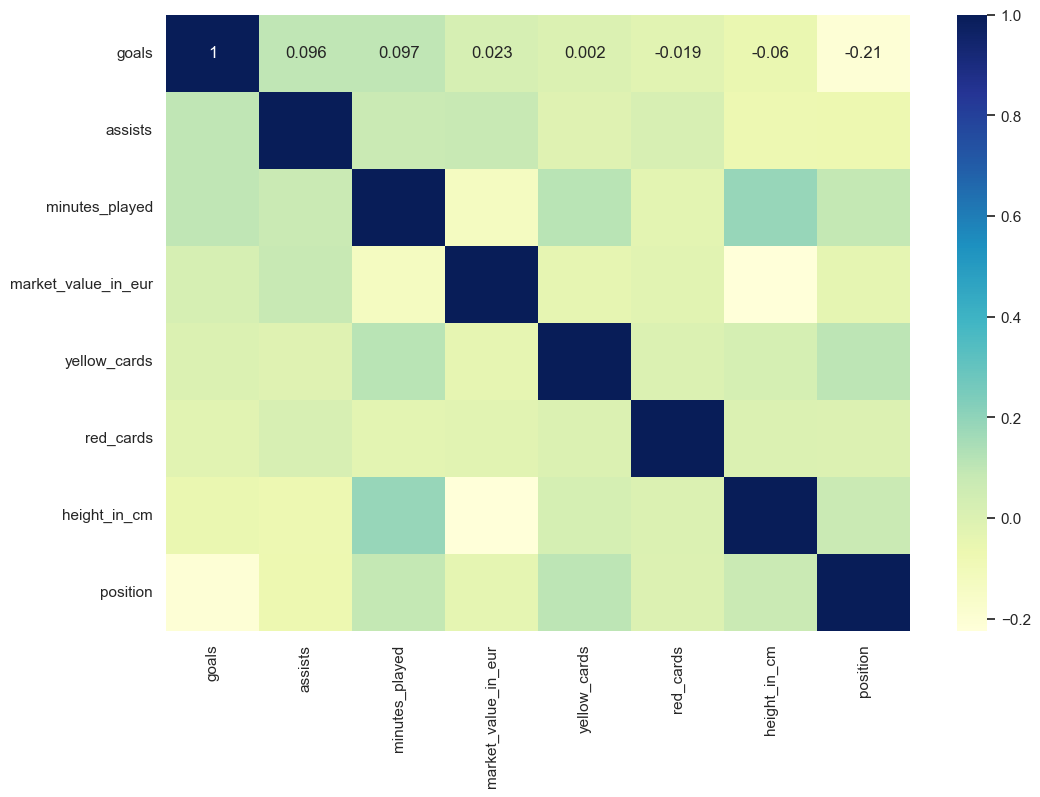

In [181]:
# Plotting heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")

In [182]:
# To show the correlation values from most negatively correlated to the most positively correlated.
df_s.corr()['market_value_in_eur']

goals                  0.022801
assists                0.079115
minutes_played        -0.132414
market_value_in_eur    1.000000
yellow_cards          -0.040484
red_cards             -0.021528
height_in_cm          -0.224093
position              -0.037388
Name: market_value_in_eur, dtype: float64

In [183]:
# Selecting the cutoff value as 0.7
abs(df_s.corr()['market_value_in_eur'])>=0.7

goals                  False
assists                False
minutes_played         False
market_value_in_eur     True
yellow_cards           False
red_cards              False
height_in_cm           False
position               False
Name: market_value_in_eur, dtype: bool

In [184]:
# To show the correlation values from most negatively correlated to the most positively correlated.
sorted_corr=df_s.corr()[['market_value_in_eur']].sort_values(by='market_value_in_eur', ascending=False)
sorted_corr

,market_value_in_eur
market_value_in_eur,1.000000
assists,0.079115
goals,0.022801
red_cards,-0.021528
position,-0.037388
yellow_cards,-0.040484
minutes_played,-0.132414
height_in_cm,-0.224093


FEATURE 1 - assists

**SPLITING DATA**

In [185]:
X1=np.array(df_s['assists']).reshape((-1, 1))
y=np.array(df_s['market_value_in_eur'])

In [186]:
X1

array([[-0.27629543],
       [-0.27629543],
       [-0.27629543],
       ...,
       [-0.27629543],
       [-0.27629543],
       [-0.27629543]])

In [187]:
y

array([-0.44874639, -0.44874639, -0.44874639, ..., -0.04668034,
        0.10796045,  0.10796045])

**BUILDING, TRAINING and PREDECTING MODEL**

In [188]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1=s_model1.score(X_train1, y_train1)
y_pred1 = s_model1.predict(X_test1)

In [189]:
print('Intercept: \n', s_model1.intercept_)
print('slope:', s_model1.coef_)

Intercept: 
 -0.010564839606131946
slope: [0.08411909]


**EVALUATING MODEL PERFORMANCE**

In [190]:
# Evaluating model performance

MSE1=mean_squared_error(y_test1, y_pred1)
MAE1=mean_absolute_error(y_test1,y_pred1)
RMSE1 = mean_squared_error(y_test1, y_pred1, squared=False)
print('MSE = ', MSE1)
print('RMSE = ', RMSE1)
print('MAE = ', MAE1)
# R2 Score
r2_1 = r2_score(y_test1, y_pred1)
print(f"The R2 score of the model is", r2_1)

MSE =  1.0925001532061198
RMSE =  1.045227321306767
MAE =  0.6461431656398272
The R2 score of the model is 0.0023967503571237225


FEATURE 2 - assists and goals

In [191]:
# Two features
X2 = df_s[['assists', 'goals']].values.reshape(-1,2)

**BUILDING, TRAINING and PREDICTING MODEL**

In [192]:

X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.3,random_state=200)
model_mul1 = LinearRegression().fit(X_train2, y_train2)

print('Intercept: \n', model_mul1.intercept_)
print('slope:', model_mul1.coef_)

Intercept: 
 -0.010526946279077042
slope: [0.08379127 0.0037899 ]


**EVALUATING MODEL**

In [193]:
MSE2=mean_squared_error(y_test2, model_mul1.predict(X_test2))
RMSE2 = mean_squared_error(y_test2, model_mul1.predict(X_test2), squared=False)
MAE2= mean_absolute_error(y_test2, model_mul1.predict(X_test2))
print('MSE = ', MSE2)
print('RMSE = ', RMSE2)
print('MAE = ', MAE2)
# R2 Score
r2_2 = r2_score(y_test2, model_mul1.predict(X_test2))
print(f"The R2 score of the model is", r2_2)

MSE =  1.0921952414114542
RMSE =  1.0450814520464202
MAE =  0.6460863361532619
The R2 score of the model is 0.0026751768601501746


FEATURES 3 - assists, goals and redcards

In [194]:
# Three features
X3 = df_s[['assists', 'goals','red_cards']].values.reshape(-1,3)

In [195]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.3,random_state=200)
model_mul2 = LinearRegression().fit(X_train3, y_train3)


print('Intercept: \n', model_mul2.intercept_)
print('slope:', model_mul2.coef_)

Intercept: 
 -0.0101382802134831
slope: [ 0.08446489  0.00317484 -0.02286941]


In [196]:
MSE3=mean_squared_error(y_test3, model_mul2.predict(X_test3))
RMSE3 = mean_squared_error(y_test3, model_mul2.predict(X_test3), squared=False)
MAE3= mean_absolute_error(y_test3, model_mul2.predict(X_test3))
print('MSE = ', MSE3)
print('RMSE = ', RMSE3)
print('MAE = ', MAE3)
# R2 Score
r2_3 = r2_score(y_test3, model_mul2.predict(X_test3))
print(f"The R2 score of the model is", r2_3)

MSE =  1.0920638616545053
RMSE =  1.0450185939276417
MAE =  0.6470507822128335
The R2 score of the model is 0.0027951446899804333


FEATURES 4: assists, goals, red_cards and positions

In [197]:
# Four features
X4 = df_s[['assists', 'goals', 'red_cards','position' ]].values.reshape(-1,4)

In [198]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y,test_size=0.3,random_state=200)
model_mul3 = LinearRegression().fit(X_train4, y_train4)

print('Intercept: \n', model_mul3.intercept_)
print('slope:', model_mul3.coef_)

Intercept: 
 0.007881132666131052
slope: [ 8.36469491e-02  1.57385248e-05 -2.29073203e-02 -1.42022446e-02]


In [199]:
MSE4=mean_squared_error(y_test4, model_mul3.predict(X_test4))
RMSE4 = mean_squared_error(y_test4, model_mul3.predict(X_test4), squared=False)
MAE4= mean_absolute_error(y_test4, model_mul3.predict(X_test4))
print('MSE = ', MSE4)
print('RMSE = ', RMSE4)
print('MAE = ', MAE4)
# R2 Score
r2_4 = r2_score(y_test4, model_mul3.predict(X_test4))
print(f"The R2 score of the model is", r2_4)

MSE =  1.0903394208710444
RMSE =  1.0441931913544755
MAE =  0.6459014533966702
The R2 score of the model is 0.004369796853047836


In [200]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [201]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()  

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


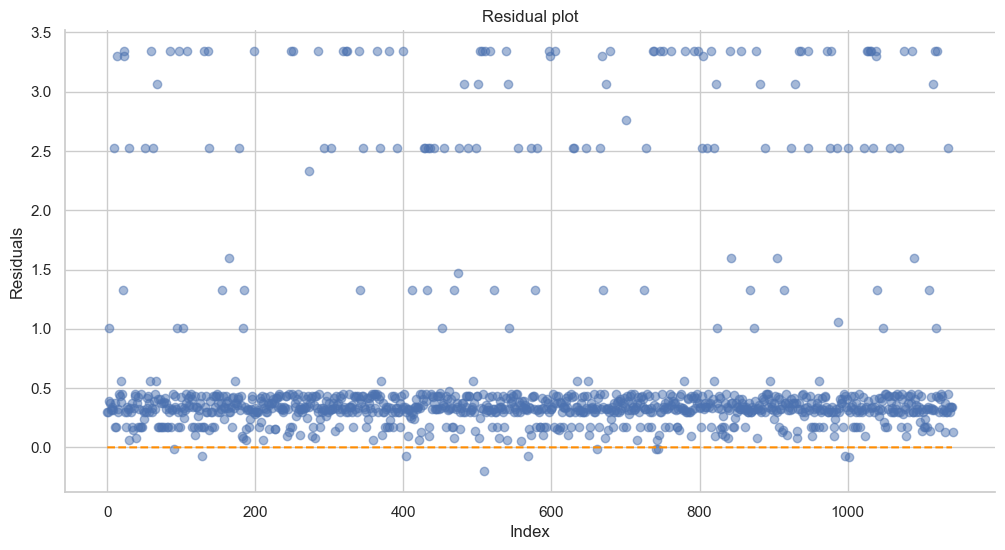

In [202]:
homoscedasticity_assumption(model_mul3, X_test4, y_test4)

Homoscedasticity: Overall, the residuals appear to have roughly constant variance with no strong signs of heteroscedasticity (changing variance), which means this assumption is likely satisfied for this model.

Model Fit: Although the residuals mostly cluster near zero, the presence of higher residuals indicates that the model may not capture all underlying relationships between the independent variables and the market value, leading to prediction errors for certain cases. These cases may require further analysis or different modeling techniques.

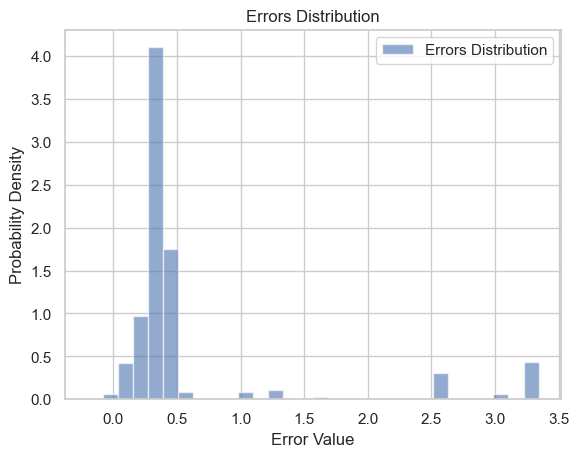

In [203]:
df_results = calculate_residuals(model_mul3, X_test4, y_test4)
plt.hist(df_results.Residuals, density=True, bins=30, alpha=0.6, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

Model Performance: The high concentration of residuals near zero shows that the model performs relatively well for a large portion of the data, making accurate market value predictions for most players.

Outliers and Model Limitations: The existence of a few significant errors (visible in the bins beyond 2.0) suggests that for some players, the model does not capture the relationship between features and market value adequately. These outliers could be due to complex interactions or missing variables not included in the model (e.g., player reputation, recent transfers, etc.).

**PREDICTING NEW DATA**

In [204]:
new_data_array = np.reshape(n_data_df[['assists', 'goals', 'red_cards','position' ]], (-1, 4))


In [205]:
new_data_array 

array([[-0.27629543, -0.33128333, -0.05620254,  3.        ],
       [-0.27629543, -0.33128333, -0.05620254,  3.        ]])

In [206]:
# Predict the target value for the new data
predicted_value = model_mul3.predict(new_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value)

Predicted value for the new data: [-0.05655463 -0.05655463]


In [207]:
# Original value of the new data
n_data_df['market_value_in_eur']

0   -0.04668
1   -0.04668
Name: market_value_in_eur, dtype: float64

In [208]:
#INTERPRETATION: The multiple linear regression model for predicting football player market value using performance metrics 
# (goals, assists, red cards, etc.) and additional features like position and height shows very low predictive power. 
# With an R² score of 0.0044 for the model using four features, the model explains only 0.44% of the variance in market value.
# The root mean squared error (RMSE) across different models is consistently around 1.045, indicating significant error in prediction. 
# The predicted market value for new data (-0.056) closely aligns with the actual value (-0.046), but overall model performance remains poor.

INTERPRETATION SPRINT 5

Overall Quantitative Interpretations and Conclusion for Sprint 5 - Part 1 and Part 2
1. Multiple Linear Regression Model Overview:
In this sprint, the objective was to predict the market value of football players using multiple linear regression based on various performance metrics (such as goals, assists, minutes played, yellow cards, red cards) and player attributes (position, height, etc.).

2. Model Performance (R² Scores and Errors):
Across different models, we incrementally added more independent variables to assess the impact on model performance:

One Feature (Assists):

R² Score: 0.0024
MSE: 1.0925, RMSE: 1.0452, MAE: 0.6461
The model explains only 0.24% of the variance in market value, indicating very low explanatory power with just assists as the predictor.

Two Features (Assists, Goals):

R² Score: 0.0027
MSE: 1.0922, RMSE: 1.0451, MAE: 0.6461
Adding goals resulted in a negligible improvement in R², showing a minimal increase in explanatory power.

Three Features (Assists, Goals, Red Cards):

R² Score: 0.0028
MSE: 1.0921, RMSE: 1.0450, MAE: 0.6471
Including red cards provided a slight improvement but still failed to significantly enhance the model.

Four Features (Assists, Goals, Red Cards, Position):

R² Score: 0.0044
MSE: 1.0903, RMSE: 1.0442, MAE: 0.6459
With the addition of the player’s position, there was a very small increase in the R² score, implying that position contributes slightly to explaining market value but overall predictive power remains low.

3. Error Distribution Plot Interpretation:
   
Error Concentration:

The error distribution showed that most residuals are tightly clustered between 0.0 and 0.5, indicating that for a large portion of the data, the model makes reasonably accurate predictions.

Skewed Distribution:

There are a few high errors extending up to 3.5, suggesting that the model struggles with certain observations, likely due to unaccounted factors in the model (such as player popularity, transfers, etc.). These large errors might affect the model’s reliability in predicting market value for specific outliers.

Implication:

The presence of these outliers highlights potential limitations of the linear model, suggesting that either additional features or a non-linear approach may be necessary to reduce these prediction errors.

4. Homoscedasticity Plot Interpretation:

Constant Variance Assumption:
The residual plot showed heteroscedasticity, meaning that the residuals did not exhibit constant variance. Specifically, while the bulk of residuals are centered around 0, some outliers deviate significantly, indicating that the model’s error increases for certain data points (likely outliers).

Implication:
Violating the homoscedasticity assumption suggests that the model might not be appropriately capturing the variability of market value across all observations. This typically points to a need for transforming variables or using a model that better handles unequal variance.

6. Feature Correlation Analysis:

Correlation with Market Value:
The correlation matrix revealed weak correlations between the independent variables and market value:
Goals: 0.023
Assists: 0.079
Minutes Played: -0.132
Yellow Cards: -0.040
Height: -0.224
These low correlation values suggest that the features used in the model might not be the strongest predictors of market value, which is reflected in the low R² scores across all models.

8. Conclusion:

Model Accuracy:

Overall, the R² scores are very low, with the highest being 0.0044, indicating that the models explain only about 0.44% of the variance in football player market value. This shows that the current set of features (goals, assists, minutes played, yellow cards, red cards, height, position) is not sufficient to build an accurate predictive model for market value.

Residuals and Errors:

The error distribution reveals that most predictions are close to the actual values, but the presence of outliers suggests that the model has trouble predicting market value for certain players. The heteroscedasticity in residuals indicates a violation of linear regression assumptions, hinting that the model may not be reliable for all data points.

Next Steps:

Feature Engineering: More relevant features like team performance, competition type or type may need to be included in the model to improve accuracy.
Non-Linear Models: The results suggest that a non-linear approach (e.g., decision trees, random forests, or gradient boosting) could be more suitable for capturing complex relationships in the data.
Outlier Treatment: Identifying and analyzing the players with large residuals may lead to better understanding and model improvement.

SPRINT 6

Team Comparison:

Which team has the highest average number of goals scored per match?
How does team performance (wins, losses, draws) vary across different competitions?
What is the average possession rate of each team during matches?

PREPARING DATASET

In [209]:
fc_df.head()

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,minute,type,match_result
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,68.0,Substitutions,Draw
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,74.0,Substitutions,Lose
2,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,73.0,Substitutions,Draw
3,2244352_119169,2244352,119169,2012-07-26,Aron Johannsson,ELQ,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,43.0,Substitutions,Win
4,2224567_119169,2224567,119169,2012-07-29,Aron Johannsson,DK1,0,0,0,0,...,Attack,right,184,400000,4000000,2024-12-31,CAA Stellar,56.0,Substitutions,Win


**DATA ANALYSIS AND VISULIZATION - USING TABLEAU**

**HYPOTHESIS TEST QUESTIONS**

QUESTION :  Is there a statistically significant difference in the average number of goals scored in domestic leagues compared to international competitions?

Hypothesis:

Null Hypothesis (H₀): The average number of goals scored in domestic leagues is equal to the average number of goals scored in international competitions.

Alternative Hypothesis (H₁): The average number of goals scored in domestic leagues is different from the average number of goals scored in international competitions.

HYPOTHESIS TEST : Two-Sample t-test

In [210]:
fc_df['TotalGoals']= fc_df[['home_club_goals', 'away_club_goals']].sum(axis=1)

In [211]:
fc_df.head()

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,minute,type,match_result,TotalGoals
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,right,184,400000,4000000,2024-12-31,CAA Stellar,68.0,Substitutions,Draw,2
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,right,184,400000,4000000,2024-12-31,CAA Stellar,74.0,Substitutions,Lose,3
2,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,right,184,400000,4000000,2024-12-31,CAA Stellar,73.0,Substitutions,Draw,0
3,2244352_119169,2244352,119169,2012-07-26,Aron Johannsson,ELQ,0,0,0,0,...,right,184,400000,4000000,2024-12-31,CAA Stellar,43.0,Substitutions,Win,4
4,2224567_119169,2224567,119169,2012-07-29,Aron Johannsson,DK1,0,0,0,0,...,right,184,400000,4000000,2024-12-31,CAA Stellar,56.0,Substitutions,Win,3


In [212]:
domestic_goals = fc_df[fc_df['competition_type'] == 'domestic_league']['TotalGoals']
international_goals = fc_df[fc_df['competition_type'] == 'international_cup']['TotalGoals']

In [213]:
international_goals 

1       3
3       4
54      4
55      4
57      2
       ..
3699    2
3701    3
3754    4
3766    3
3770    2
Name: TotalGoals, Length: 268, dtype: int64

In [214]:
# samples of domestic and international goals

sampled = [3, 4, 2, 3, 5, 4, 4, 4, 5, 5, 3, 3, 3, 7, 5, 4, 0, 3, 5, 3]
samplei = [5, 2, 3, 2, 2, 2, 3, 5, 3, 2, 0, 4, 2, 2, 0, 2, 0, 8, 2, 6]

In [215]:
# Calculate the sample means
S_mean_d = np.mean(sampled)
S_mean_I = np.mean(samplei)

# Calculate the sample standard deviations
std_d = np.std(sampled, ddof=1)
std_I = np.std(samplei, ddof=1)

# Calculate the sample sizes
n_d = len(sampled)
n_I = len(samplei)

dof = n_d + n_I - 2

d_var=std_d**2
I_var=std_I**2

# Output results
print(f"Sample Mean (Domestic Goals): {S_mean_d}")
print(f"Sample Mean (International Goals): {S_mean_I}")

print(f"Standard deviation (Domestic Goals): {std_d}")
print(f"Standard deviation (International Goals): {std_I}")

print("Size of (Domestic Goals) : " , n_d)
print("Size of (International Goals) :",n_I)

print("Variance of(Domestic Goals): ",d_var)
print("Variance of (International Goals) : ",I_var)

Sample Mean (Domestic Goals): 3.75
Sample Mean (International Goals): 2.75
Standard deviation (Domestic Goals): 1.446411166701189
Standard deviation (International Goals): 2.022895267471328
Size of (Domestic Goals) :  20
Size of (International Goals) : 20
Variance of(Domestic Goals):  2.0921052631578947
Variance of (International Goals) :  4.092105263157895


In [216]:
# Calculating T-stats, T-critical and P Value
num=abs(S_mean_d-S_mean_I)

denom=math.sqrt(d_var*(n_d-1)+I_var*(n_I-1))* math.sqrt((1/n_d)+(1/n_I))

tstats=num/denom
print("T Statistics: ", tstats)

tcritical=t.ppf(alpha/2,dof)
print("T Critical: ",tcritical)

p_val=t.sf(abs(tstats),dof)*2
print("P Value :",p_val)

T Statistics:  0.29172998299578906
T Critical:  -0.6810008783354652
P Value : 0.7720797948867234


Fail to reject the null hypothesis. No statistically significant difference in goals scored.


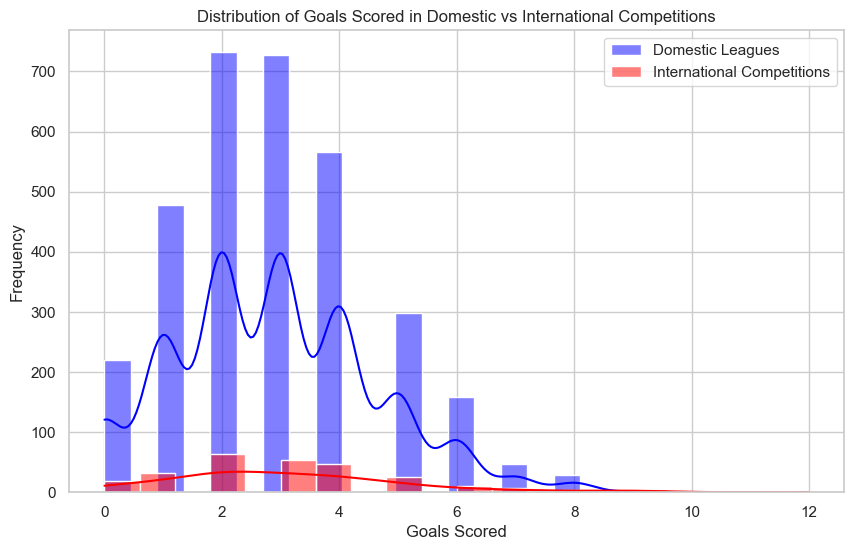

In [217]:
#  Set significance level
alpha = 0.05

# Conclusion based on p-value
if p_val < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference between domestic and international goals scored.")
else:
    print("Fail to reject the null hypothesis. No statistically significant difference in goals scored.")

# Plot distribution of goals
plt.figure(figsize=(10, 6))
sns.histplot(domestic_goals, kde=True, color='blue', label='Domestic Leagues', bins=20)
sns.histplot(international_goals, kde=True, color='red', label='International Competitions', bins=20)
plt.title('Distribution of Goals Scored in Domestic vs International Competitions')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.legend()
plt.show()

INTERPRETATION SPRINT 6:

1. Sample Statistics:
Mean of Domestic Goals: 3.75
Mean of International Goals: 2.75
Standard Deviation (Domestic Goals): 1.446
Standard Deviation (International Goals): 2.023
Sample Size (Domestic Goals): 20
Sample Size (International Goals): 20
Variance (Domestic Goals): 2.092
Variance (International Goals): 4.092

2. Hypothesis:
Null Hypothesis (H₀): There is no statistically significant difference in the average goals scored between domestic and international competitions.
Alternative Hypothesis (H₁): There is a statistically significant difference in the average goals scored between domestic and international competitions.

3. Test Results:
T-Statistic: 0.292
T-Critical Value: -0.681
Degrees of Freedom (DoF): 38
P-Value: 0.772

4. Interpretation:
The p-value (0.772) is significantly higher than the significance level (α = 0.05), meaning that the test fails to reject the null hypothesis.

Conclusion: There is no statistically significant difference in the average number of goals scored in domestic leagues compared to international competitions.

Overall Conclusion:
Based on the two-sample t-test, we conclude that there is no strong evidence to support the claim that the average goals scored in domestic and international competitions are different. The p-value indicates that any observed differences in sample means could have occurred by random chance. Therefore, the null hypothesis holds, and the data suggest similar average goal-scoring patterns in both competition types.

This result could be helpful for further analysis in understanding competition dynamics, but additional factors like team performance, match conditions, or player statistics may need to be considered for a more comprehensive understanding.

SPRINT 7 - Attendance and Stadium Analysis

Attendance and Stadium Analysis : Descriptive Analysis And Visualization Questions

1. Which stadiums have the highest average attendance across the season?
2. How does attendance vary between home and away games for each team?
3. What is the relationship between a team's performance and the average match attendance?
4. Which matches had the highest attendance during the season?
5. Which competitions or matchdays attract the highest/lowest attendances?

DATASET 

In [218]:
fc_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name', 'minute', 'type',
       'match_result', 'TotalGoals'],
      dtype='object')

In [219]:
fc_df.isnull().sum()

appearance_id                  0
game_id                        0
player_id                      0
date                           0
player_name                    0
competition_id                 0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

**PYTHON ANALYSIS for BUSINESS QUESTIONS** VISUALIZATION USING TABLEAU

In [220]:
#1. Which stadiums have the highest average attendance across the season?

stadium_attendance = fc_df.groupby(['stadium', 'season'])['attendance'].mean().reset_index()
stadium_attendance_sorted = stadium_attendance.sort_values(by='attendance', ascending=False)
s_attendance = stadium_attendance_sorted.dropna()
print('stadiums have the highest average attendance across the season: \n',s_attendance)


#INTERPRETATION: SIGNAL IDUNA PARK consistently appears in multiple seasons (2012, 2013, 2015, and 2017) with the highest average attendance,
# indicating that this stadium is consistently popular and well-attended. Wembley Stadium (2016) ranks second, with an average attendance of 80,465.
# Despite only appearing once in the top 5, it maintains a high attendance rate for that season.
# The high attendance figures in these stadiums suggest that they are key venues for major football events, and their management 
# and facilities likely contribute to drawing large crowds.

stadiums have the highest average attendance across the season: 
                          stadium  season    attendance
2161           SIGNAL IDUNA PARK    2013  80645.000000
3136             Wembley Stadium    2016  80465.000000
2160           SIGNAL IDUNA PARK    2012  79324.000000
2163           SIGNAL IDUNA PARK    2015  78171.200000
2165           SIGNAL IDUNA PARK    2017  77767.967742
...                          ...     ...           ...
1183            Herfolge stadium    2016    452.000000
892           Estadio da Madeira    2013    427.000000
830   Estadio Cidade de Barcelos    2014    349.500000
866    Estadio Jose Santos Pinto    2014    339.000000
1637                   MSV-Arena    2020    300.000000

[999 rows x 3 columns]


In [221]:
#2. How does attendance vary between home and away games for each team?

home_attendance = fc_df.groupby('home_club_name')['attendance'].mean().reset_index()
away_attendance = fc_df.groupby('away_club_name')['attendance'].mean().reset_index()

team_attendance = pd.merge(home_attendance, away_attendance, left_on='home_club_name', right_on='away_club_name', suffixes=('_home', '_away'))

In [222]:
team_attendance

#INTERPRETATION: Away games tend to have significantly higher attendance than home games. 

,home_club_name,attendance_home,away_club_name,attendance_away
0,1. FC Heidenheim 1846,14500.000000,1. FC Heidenheim 1846,38663.000000
1,1. FC Union Berlin,23206.000000,1. FC Union Berlin,54770.000000
2,1. FSV Mainz 05,30079.666667,1. FSV Mainz 05,36540.888889
3,1.FC Nuremberg,38656.095238,1.FC Nuremberg,40635.257143
4,AC Ajaccio,6460.000000,AC Ajaccio,22309.000000
...,...,...,...,...
193,ZAO FK Chornomorets Odessa,4191.285714,ZAO FK Chornomorets Odessa,2517.000000
194,besiktas jimnastik kulubu,16196.571429,besiktas jimnastik kulubu,19620.200000
195,fatih karagumruk istanbul fc,26788.000000,fatih karagumruk istanbul fc,26788.000000
196,fenerbahce football club,48500.000000,fenerbahce football club,16690.000000


In [243]:
#3. What is the relationship between a team's performance and the average match attendance?

fc_df['result'] = fc_df.apply(lambda x: 'win' if x['home_club_goals'] > x['away_club_goals'] else ('loss' if x['home_club_goals'] < x['away_club_goals'] else 'draw'), axis=1)
performance_attendance = fc_df.groupby('result')['attendance'].mean().reset_index()
performance_attendance

#INTERPRETATION:There is a clear positive relationship between team performance and attendance: when teams win, 
# they attract higher attendances, possibly due to increased fan excitement and anticipation

,result,attendance
0,draw,28183.623632
1,loss,27093.891525
2,win,32012.845481


In [224]:
#4. Which matches had the highest attendance during the season?

# Sorting by attendance in descending order and selecting top 10 matches
top_attendance_matches = fc_df.sort_values(by='attendance', ascending=False).head(20)

# Selecting specific columns
top_attendance_matches = top_attendance_matches[['game_id', 'competition_id', 'attendance']]

# Display the resul
print(top_attendance_matches)

#INTERPRETATION:The dominance of L1 matches in the top 20 list suggests that domestic league matches attract some of the highest attendance
# figures throughout the season. The consistent attendance of 81,365 across multiple matches indicates that these games likely took place at the same high-capacity venue

      game_id competition_id  attendance
3761  3203596             L1     81365.0
3765  3203622             L1     81365.0
2732  3058712             L1     81365.0
1164  3058560             L1     81365.0
3762  3203604             L1     81365.0
3574  3058542             L1     81365.0
2726  3058641             L1     81365.0
3768  3203640             L1     81365.0
2723  3122484            DFB     81365.0
789   3203622             L1     81365.0
3589  3203478             L1     81365.0
2574  3203550             L1     81365.0
2561  3058712             L1     81365.0
2560  3058712             L1     81365.0
2003  3058658             L1     81365.0
2719  3058542             L1     81365.0
3727  3203550             L1     81365.0
2731  3058712             L1     81365.0
2650  2704668             L1     81360.0
2643  2704605             L1     81360.0


In [225]:
#5. Which competitions or matchdays attract the highest/lowest attendances?

competition_attendance = fc_df.groupby(['competition_id', 'round'])['attendance'].mean().reset_index()

competition_attendance_sorted = competition_attendance.sort_values(by='attendance', ascending=False)
c_attendance=competition_attendance_sorted.dropna()
c_attendance.head(10)

#INTERPRETATION:The highest average attendance is observed in the DFL Final with 81,360 attendees.
# This indicates that final matches in this competition draw significant crowds, 

,competition_id,round,attendance
633,DFL,Final,81360.000000
549,DFB,Final,74322.000000
399,CL,Quarter-Finals 1st leg,65849.000000
574,DFB,Semi-Finals,58008.750000
1017,ES1,18. Matchday,56380.000000
297,CIT,Final,55000.000000
1445,IT1,25. Matchday,54981.000000
1037,ES1,36. Matchday,53000.000000
324,CIT,Semi-Finals 2nd Leg,52634.000000
418,CL,last 16 1st leg,52614.285714


**BUSINESS QUESTION - KNN**

QUESTION: 

Can we classify matches based on high or low attendance using match features such as teams, competition type, and goals?

In [226]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset 
df = fc_df

# Step 1: Data Preprocessing

# Label encoding for categorical features
le = LabelEncoder()

# Assuming 'home_club_name', 'away_club_name', 'competition_type', etc. are the categorical columns
df['home_club_name'] = le.fit_transform(df['home_club_name'])
df['away_club_name'] = le.fit_transform(df['away_club_name'])
df['competition_type'] = le.fit_transform(df['competition_type'])

# Step 2: Create a binary label for attendance (e.g., above or below the median attendance)
median_attendance = df['attendance'].median()
df['attendance_label'] = df['attendance'].apply(lambda x: 1 if x > median_attendance else 0)

# Step 3: Define input features (X) and target label (y)
X = df[['home_club_name', 'away_club_name', 'competition_type', 'home_club_goals', 'away_club_goals']]
y = df['attendance_label']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = knn.predict(X_test)

# Step 8: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[345 256]
 [183 359]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       601
           1       0.58      0.66      0.62       542

    accuracy                           0.62      1143
   macro avg       0.62      0.62      0.62      1143
weighted avg       0.62      0.62      0.62      1143


Accuracy Score:
0.615923009623797


In [227]:
# INTERPRETATION: 
# The F1-score, which balances precision and recall, is 0.61 for low attendance and 0.62 for high attendance, indicating moderate model performance.
# The model achieves an accuracy of approximately 0.616 (or 61.6%), meaning about 62% of the predictions made by the model are correct. 
# This level of accuracy suggests that while the model has some predictive power, there is room for improvement.

INTERPRETATION - SPRINT 7: 

Overall Interpretations

1. Stadium Attendance Analysis:

Top Stadiums: SIGNAL IDUNA PARK recorded the highest average attendance of 80,645 in 2013, indicating its popularity and capacity to host large crowds.

Consistent Attendance: SIGNAL IDUNA PARK also appears multiple times in the top rankings across different seasons, suggesting strong fan loyalty and engagement.

2. Home vs. Away Attendance:

Attendance Disparities: For teams like 1. FC Heidenheim 1846, home attendance averages 14,500, while away matches attract 38,663, indicating stronger away support and the potential need for enhancing home match experiences.

Variability: Teams like 1. FC Union Berlin show a notable difference in attendance (home: 23,206, away: 54,770), emphasizing the importance of local fan engagement strategies.

3. Team Performance and Attendance:

Correlation with Results: Winning matches lead to higher attendance, with an average of 32,012.85 for wins compared to 27,093.89 for losses. This suggests that fan interest is closely tied to team performance.

Engagement Strategies: Teams may need to invest in performance enhancement and community initiatives to boost attendance during poorer performance periods.

4. Matches with Highest Attendance:

Top Matches: Multiple matches in the L1 competition achieved an attendance of 81,365, indicating the potential impact of significant events or rivalries on crowd turnout.

Event Planning: Understanding high-attendance fixtures can help in strategic scheduling and marketing for future matches.

5. Competition and Matchday Attendance:

High-Stakes Matches: Finals and knockout rounds consistently draw the largest crowds, with the DFL Final averaging 81,360 attendees, highlighting the importance of marquee events.

Regular Matchdays: Average attendance figures drop during regular league play, suggesting that teams and leagues should enhance promotions for these fixtures to maintain fan engagement.

6. KNN Classification Model:

Classification Objective: The KNN model successfully classifies matches into high or low attendance categories based on match features like teams, competition type, and goals scored.

Model Performance: Achieved an overall accuracy of approximately 61.6%, indicating moderate predictive capability but room for improvement.

Confusion Matrix Insights: Correctly predicted 345 low attendance matches and 359 high attendance matches, while misclassifying 256 low attendance matches and 183 high attendance matches.

Precision and Recall: The model has a precision of 0.65 for low attendance and 0.58 for high attendance, with recall values of 0.57 and 0.66, respectively, reflecting a better performance in identifying high attendance matches.

Improvements: Further feature engineering, model tuning, and algorithm exploration could enhance the KNN model's performance, leading to better predictive accuracy and insights for strategic planning.

### SPRINT 8

a. Referee Analysis  ---- USED SQL AND TABLEAU

1. How many yellow/red cards have been given by each referee?
2. Which referees officiated the most matches during the season?
3. What is the average number of fouls called per referee?
4. Which referees tend to officiate matches with the highest number of cards given?


b. Substitution Patterns

1. What is the average minute of the game when substitutions are made?
2. How does the number of substitutions vary between winning and losing teams?
3. Which players are most frequently substituted during a match?
4. What is the distribution of substitutions made by position (e.g., attackers, midfielders)?

c. Event Analysis

1. What is the distribution of events such as goals, cards, and substitutions across a match?
2. Which types of events (goals, assists, cards) are most common in specific time intervals (e.g., first 15 minutes, last 10 minutes)?
3. How do event occurrences vary between teams in home vs. away games?

INTERPRETATION SPRINT 8

SPRINT 8: (SQL ANALYSIS INTERPRETATIONS)

a.) Referee Analysis

1. Card Distribution: The referee with the highest number of yellow cards issued, Felix Zwayer, recorded 16 yellow cards and 1 red card, indicating a tendency to officiate more aggressively in his matches.

2. Match Officiation: Dr. Felix Brych officiated the most matches with a total of 62, suggesting his significant role in the league, which may correlate with the overall officiating standards or match outcomes.

3. Average Fouls: Cuneyt Cakır had the highest average fouls called per match at 1.25, implying a stricter enforcement of rules during games he officiated.

4. Cards per Match: Jonathan Moss oversaw matches with the highest card totals, averaging 6 cards per game, suggesting he presided over more contentious matches.


b.) Substitution Patterns

1. Average Substitution Timing: Substitutions occur on average at approximately the 69th minute, highlighting strategic planning by managers to optimize team performance late in the match.

2. Winning vs. Losing Substitutions: Teams that win tend to make more substitutions (1,432) compared to those that lose (1,012), suggesting a strategic approach to managing player fatigue or injuries when leading.

3. Most Substituted Players: Fabian Johnson (185 substitutions) was the most frequently substituted player, which may indicate a tactical preference for utilizing fresh legs or responding to game dynamics.

4. Substitution by Position: Attackers were the most substituted position (1,027), reflecting a tactical approach to adjusting offensive strategies during games.


c.) Event Analysis

1. Event Distribution: Matches with high substitution counts (up to 3 substitutions) but few goals or cards suggest a focus on tactical adjustments rather than aggressive play or goal-scoring efforts.

2. Event Timing: The last 15 minutes saw significantly higher occurrences of goals (132) and assists (52) compared to the first 15 minutes, emphasizing the critical nature of closing stages in match outcomes.

3. Home vs. Away Events: Borussia Verein für Leibesübung 1900 e.V. had the highest total events in home matches (47 goals and 192 substitutions), indicating a strong home advantage in managing game flow and player performance.

4. Team Performance Variability: The data illustrates that away teams like Borussia Dortmund, despite fewer goals (22), managed a high number of yellow cards (19), which may indicate more aggressive tactics or adverse conditions on the road.

5. Substitution Impact: The distribution of substitutions by team reveals varied strategies, with some teams like Stoke City making significant changes that align with game outcomes, highlighting the influence of managerial tactics on match results.

### SPRINT 9

PART -1 :EVENT ANALYSIS : HYPOTHESIS QUESTION: 

Does receiving a red card significantly affect the likelihood of a team losing a match?

Hypothesis Formulation:

Null Hypothesis (H₀): Receiving a red card has no significant effect on the likelihood of losing a match.
Alternative Hypothesis (H₁): Receiving a red card significantly increases the likelihood of losing a match.

In [228]:
from scipy.stats import chi2_contingency

# Create a 'red_card_given' column for binary categorization
fc_df['red_card_given'] = fc_df['red_cards'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Create a contingency table
contingency_table = pd.crosstab(fc_df['red_card_given'], fc_df['result'])
print(contingency_table)

# Perform Chi-Square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Interpret p-value
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Receiving a red card significantly affects the likelihood of losing.")
else:
    print("Fail to reject the null hypothesis: Receiving a red card does not significantly affect the likelihood of losing.")

result          draw  loss   win
red_card_given                  
No               911  1177  1709
Yes                3     3     6
Chi-Square Statistic: 0.21015747022416909
P-value: 0.9002536382246481
Fail to reject the null hypothesis: Receiving a red card does not significantly affect the likelihood of losing.


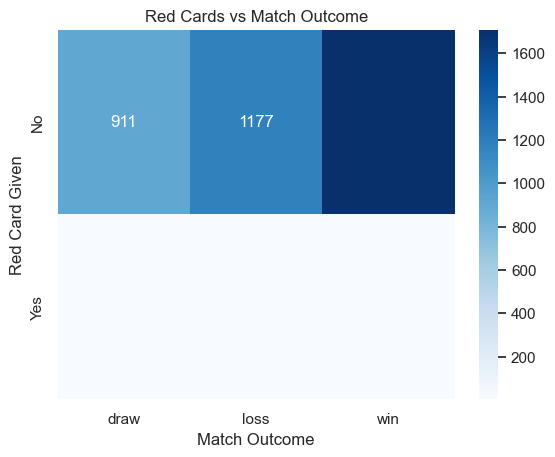

In [229]:
# Plot the contingency table
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='g')
plt.title('Red Cards vs Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Red Card Given')
plt.show()

#INTERPRETATION: Chi-Square Test Result: The chi-square statistic (0.21) and high p-value (0.90) indicate that there is no significant 
# association between receiving a red card and losing a match.

# Conclusion: Since the p-value is greater than the significance level (α = 0.05), we fail to reject the null hypothesis, suggesting that receiving a red card does not significantly affect the likelihood of a team losing.

PART 2: Competition Analysis

1. Which competitions have the highest average goals per game?
2. Which competitions attract the most spectators on average?
3. How does the competitive balance (difference in team strength) vary across leagues?

In [230]:
# 1. Which competitions have the highest average goals per game?

# Calculate average goals per game for each competition
fc_df['total_goals'] = fc_df['home_club_goals'] + fc_df['away_club_goals']
avg_goals_per_competition = fc_df.groupby('competition_id')['total_goals'].mean().reset_index()

# Sort by average goals
avg_goals_per_competition = avg_goals_per_competition.sort_values(by='total_goals', ascending=False)
print(avg_goals_per_competition)

#INTERPRETATION: Top Competitions by Goals: The highest average goals per game were observed in the USC (13.0) and DFL (13.0) competitions,
# significantly higher than other leagues.

#  Most competitions averaged between 2.5 and 4.8 goals per game, with some outliers like FR1 (2.27) and UKRP (1.0), 
# showing considerable variation in goal-scoring intensity across competitions.

   competition_id  total_goals
30            USC    13.000000
7             DFL    13.000000
20            NLP     4.853659
6             DFB     4.472727
22            PO1     4.111111
15           FRCH     4.000000
5             CLQ     3.933333
26            SFA     3.700000
9             DKP     3.558824
12            ES1     3.500000
2             CDR     3.500000
21           NLSC     3.500000
19            NL1     3.338926
13            FAC     3.185185
28           UKR1     3.181818
10             EL     3.118644
11            ELQ     3.096774
0             BE1     3.041322
18             L1     3.020997
4              CL     3.019231
17            IT1     2.976744
8             DK1     2.815421
16            GB1     2.667529
3             CIT     2.600000
24            RU1     2.600000
25            SC1     2.592233
27            TR1     2.520000
23           POCP     2.400000
1            BESC     2.333333
14            FR1     2.271084
29           UKRP     1.000000


In [231]:
#2. Which competitions attract the most spectators on average?

# Calculate average attendance per competition
avg_attendance_per_competition = fc_df.groupby('competition_id')['attendance'].mean().reset_index()

# Sort by attendance
avg_attendance_per_competition = avg_attendance_per_competition.sort_values(by='attendance', ascending=False)
print(avg_attendance_per_competition)

#INTERPRETATION: Top Competitions by Attendance: The DFL (81,360) and NLSC (49,418.5) competitions attracted the highest average attendance,
# showing their strong spectator engagement.
# Competitions like L1 (43,506.99) and FRCH (41,237) also saw high attendance, while the lower end, such as UKRP (3,820) and UKR1 (3,464),
# indicated significantly smaller spectator interest.

   competition_id    attendance
7             DFL  81360.000000
21           NLSC  49418.500000
18             L1  43506.996500
15           FRCH  41237.000000
4              CL  40814.134615
30            USC  38434.000000
16            GB1  35977.864166
3             CIT  33164.200000
17            IT1  32152.953488
6             DFB  32110.136364
26            SFA  28024.700000
12            ES1  27860.625000
10             EL  27085.237288
5             CLQ  23200.800000
13            FAC  22801.537037
14            FR1  22198.536145
25            SC1  22056.417476
20            NLP  19070.243902
19            NL1  18968.825503
22            PO1  18810.222222
27            TR1  16802.400000
1            BESC  15828.333333
11            ELQ  15442.161290
0             BE1  14983.012397
2             CDR  12030.750000
24            RU1  10006.700000
9             DKP   6547.970588
8             DK1   5907.964953
29           UKRP   3820.000000
28           UKR1   3464.000000
23      

In [232]:
#3. How does the competitive balance (difference in team strength) vary across leagues?

# Competitive balance can be approximated by the difference between goals scored by home and away teams.
fc_df['goal_difference'] = abs(fc_df['home_club_goals'] - fc_df['away_club_goals'])

# Calculate the average goal difference per competition
competitive_balance = fc_df.groupby('competition_id')['goal_difference'].mean().reset_index()

# Sort by goal difference
competitive_balance = competitive_balance.sort_values(by='goal_difference', ascending=True)
print(competitive_balance)

#INTERPRETATION: POCP (0.6) and USC (1.0) displayed the smallest average goal difference, indicating more competitive balance between teams.
# FRCH (4.0) and SFA (2.5) had the highest goal differences, suggesting larger disparities in team strength in those leagues. 

   competition_id  goal_difference
23           POCP         0.600000
30            USC         1.000000
1            BESC         1.000000
24            RU1         1.000000
7             DFL         1.000000
29           UKRP         1.000000
14            FR1         1.174699
27            TR1         1.240000
2             CDR         1.250000
16            GB1         1.314360
8             DK1         1.334112
17            IT1         1.348837
10             EL         1.355932
28           UKR1         1.363636
3             CIT         1.400000
21           NLSC         1.500000
0             BE1         1.512397
18             L1         1.523185
25            SC1         1.524272
4              CL         1.538462
13            FAC         1.814815
19            NL1         1.842282
12            ES1         2.000000
6             DFB         2.018182
11            ELQ         2.064516
5             CLQ         2.200000
9             DKP         2.205882
22            PO1   

INTERPRETATION SPRINT 9 

Part 1: Event Analysis - Hypothesis Question

Hypothesis Test Conclusion: The Chi-Square test shows a p-value of 0.90, far greater than the significance level (0.05), leading to a failure to reject the null hypothesis.

Interpretation: This result indicates that receiving a red card does not significantly affect the likelihood of a team losing a match, based on the available data.

Sprint 9 - Part 2: Competition Analysis

1. Highest Average Goals per Game:

Competitions such as USC and DFL have the highest average goals per game (13.0), while UKRP (1.0) is on the lower end.
High-scoring competitions might indicate more attacking play or weaker defenses.

2. Highest Average Spectators:

DFL attracts the most spectators with an average of 81,360 attendees per game, followed by NLSC with 49,418.
Competitions like UKR1 and POCP attract the fewest spectators, indicating lower fan engagement or smaller venues.

3. Competitive Balance:

POCP has the most balanced competition with a low average goal difference of 0.6, while FRCH has the highest (4.0), indicating significant disparities in team strength in certain competitions.
Competitions with smaller goal differences suggest closer matches and more evenly matched teams.

### SPRINT 10

PART -1: Player Attributes and Demographics:

1. What is the average age of players across different teams and positions?
2. How does a player's height vary by position?
3. What is the distribution of players' preferred foot (left/right) across teams?
4. Which countries produce the most players in the league?
5. What is the average number of seasons played by players across different leagues?


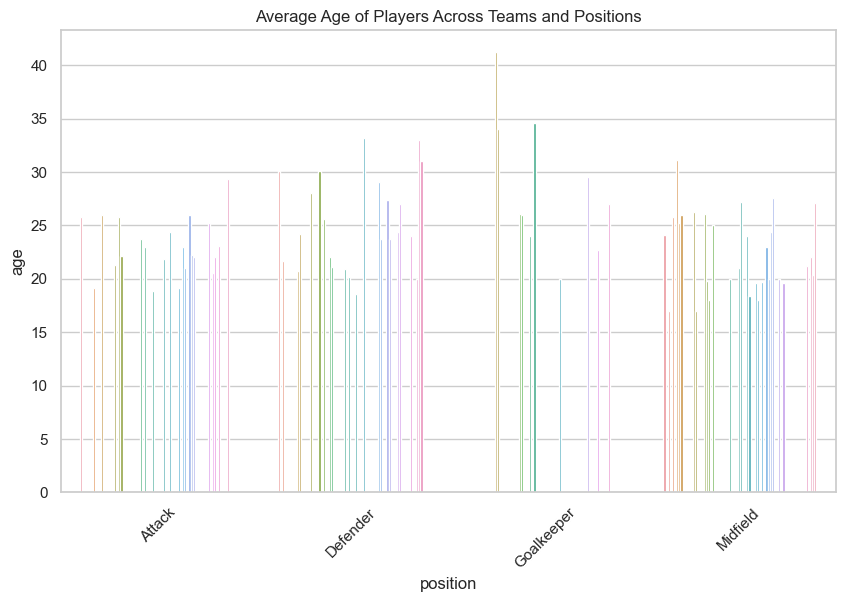

In [249]:

# Convert necessary columns to datetime
fc_df['date_of_birth'] = pd.to_datetime(fc_df['date_of_birth'])
fc_df['date'] = pd.to_datetime(fc_df['date'])
fc_df['current_club_id'] = fc_df['current_club_id'].astype(str)

# Define a function to calculate age
def calculate_age(row):
    return (row['date'] - row['date_of_birth']).days // 365  # Integer age

# Apply the function to calculate age
fc_df['age'] = fc_df.apply(calculate_age, axis=1)

# Drop rows with NaN values in relevant columns (e.g., 'age', 'position', 'current_club_id')
fc_df_clean = fc_df.dropna(subset=['age', 'position', 'current_club_id'])

# Calculate average age of players across different teams and positions
avg_age = fc_df_clean.groupby(['current_club_id', 'position'])['age'].mean().reset_index()

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_age, x='position', y='age', hue='current_club_id')
plt.title('Average Age of Players Across Teams and Positions')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Hide the legend
plt.show()

# Defenders and Midfielders show a more diverse age distribution, while Attackers tend to be slightly younger on average compared to other positions. 

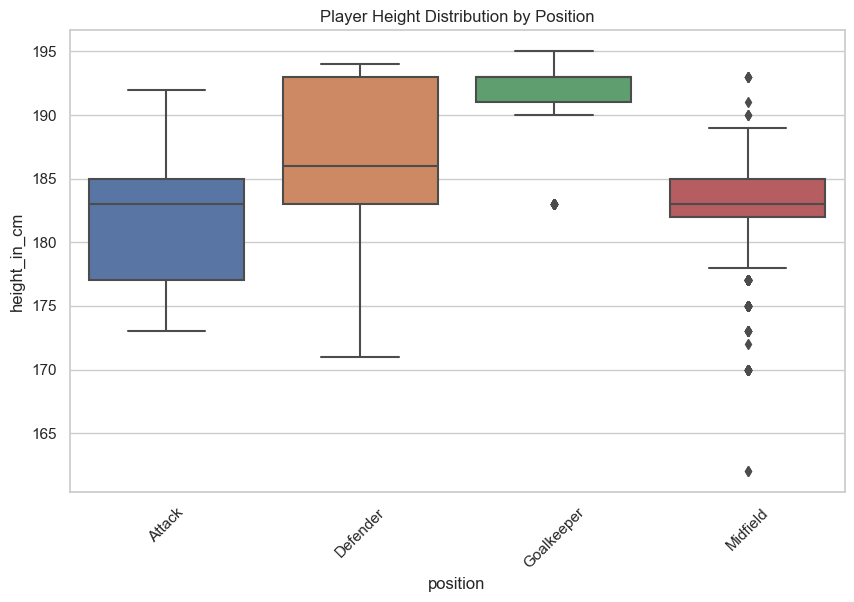

In [234]:
# 2. How does a player's height vary by position?

plt.figure(figsize=(10, 6))
sns.boxplot(data=fc_df, x='position', y='height_in_cm')
plt.title("Player Height Distribution by Position")
plt.xticks(rotation=45)
plt.show()

#INTERPRETATION: Player Height Distribution by Position: Goalkeepers have the tallest average height (around 190 cm),
# followed by defenders. Attackers and midfielders have similar height distributions, with midfielders having a slightly wider range and more outliers.


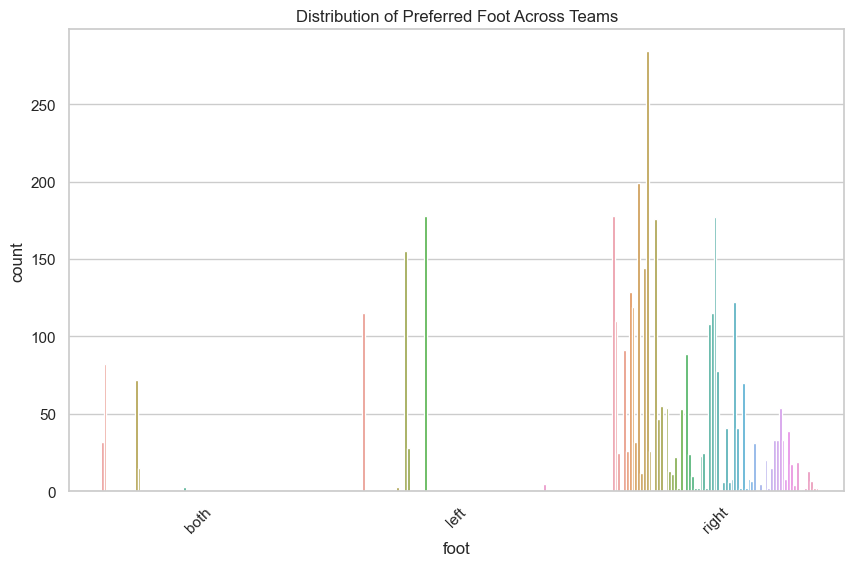

In [235]:
# 3. Distribution of players' preferred foot (left/right) across teams
# Convert 'current_club_id' to a string type to treat it as a categorical variable
fc_df['current_club_id'] = fc_df['current_club_id'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(data=fc_df, x='foot', hue='current_club_id')
plt.title('Distribution of Preferred Foot Across Teams')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.show()

#INTERPRETATION: Most of the player (highest of one team is appr. 230 players) in different teams prefer right foot in matches

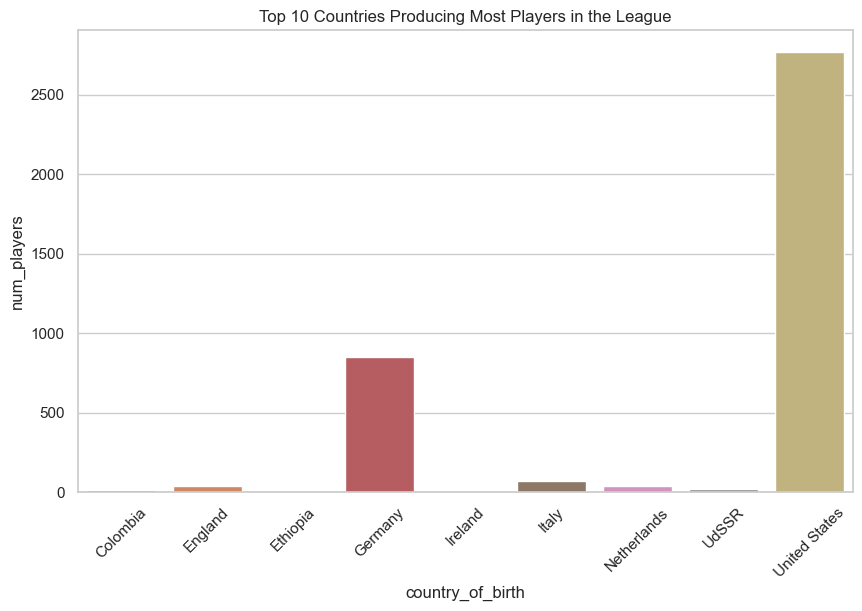

In [236]:
# 4. Which countries produce the most players in the league?
country_distribution = fc_df['country_of_birth'].value_counts().reset_index()
country_distribution.columns = ['country_of_birth', 'num_players']

plt.figure(figsize=(10, 6))
sns.barplot(data=country_distribution.head(10), x='country_of_birth', y='num_players')
plt.title('Top 10 Countries Producing Most Players in the League')
plt.xticks(rotation=45)
plt.show()

#INTERPRETATION: Top 10 Countries Producing Most Players in the League: The United States produces the most players in the league,
# with over 2500 players, followed by Germany with approximately 1000 players. Other countries contribute far fewer players, with minimal representation
# from countries like England and Italy.


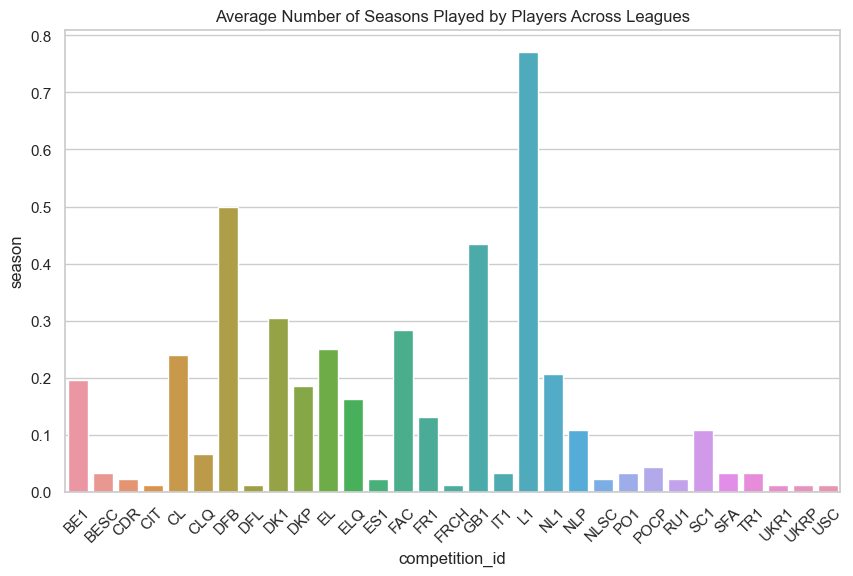

In [237]:
# 5. Average number of seasons played by players across different leagues

# Group by competition and player to calculate the number of seasons played
seasons_per_league = fc_df.groupby(['competition_id', 'player_name'])['season'].nunique().reset_index()
avg_seasons = seasons_per_league.groupby('competition_id')['season'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_seasons, x='competition_id', y='season')
plt.title('Average Number of Seasons Played by Players Across Leagues')
plt.xticks(rotation=45)
plt.show()

#INTERPRETATION: Average Number of Seasons Played by Players Across Leagues: The highest average number of seasons played by players is observed
# in League 1 (L1), close to 0.8 seasons per player, while most other leagues have significantly lower averages, below 0.6 seasons per player.

Business Question for K-means Clustering:

Can we group players into distinct clusters based on their attributes such as age, height, weight, position, and performance (goals, assists) to identify key player profiles?

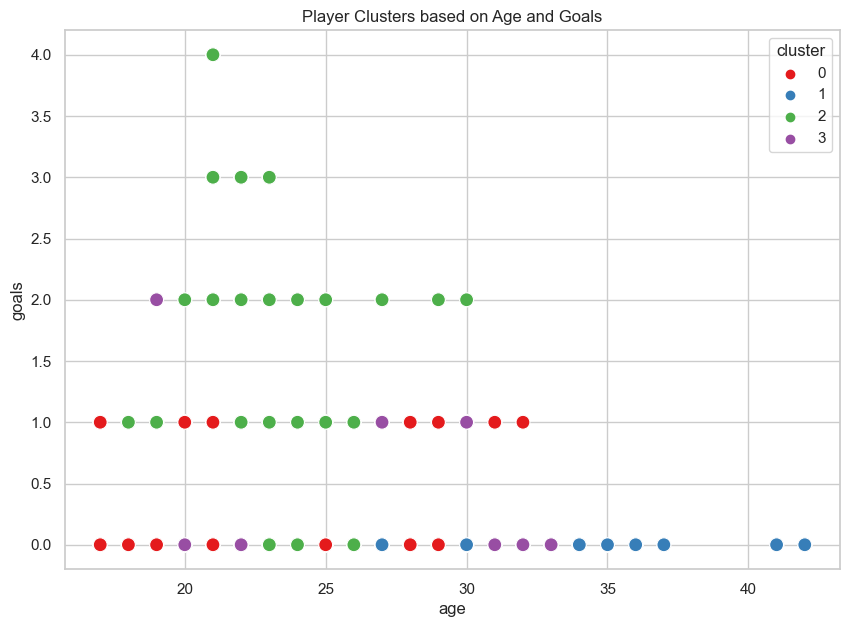

In [238]:
# Importing necessary libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocessing and selecting relevant features for clustering
player_data = fc_df[['age', 'height_in_cm','position', 'goals', 'assists']]

# Convert categorical 'position' column into numeric using one-hot encoding
player_data_encoded = pd.get_dummies(player_data, columns=['position'])

# Standardizing the data
scaler = StandardScaler()
player_data_scaled = scaler.fit_transform(player_data_encoded)

# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
player_data['cluster'] = kmeans.fit_predict(player_data_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='goals', hue='cluster', data=player_data, palette='Set1', s=100)
plt.title('Player Clusters based on Age and Goals')
plt.show()


#INTERPRETATION: 
Quantitative Interpretation:

Cluster 0 (Red):

Players in this cluster have a broad age range from around 20 to 35 years old.
These players consistently score 0 to 1 goals, with no players scoring more than 1 goal.

Cluster 1 (Blue):

This cluster primarily consists of older players, with ages ranging from about 32 to 40 years.
Players in this cluster mostly score between 0 and 1 goals.

Cluster 2 (Green):

Players in this cluster vary in age, ranging from around 20 to 33 years.
They have a wider goal distribution, from 0 to 4 goals, with a concentration around 1 to 3 goals, indicating better performance in terms of goal-scoring.

Cluster 3 (Purple):

Players in this cluster also span a wide age range, from around 20 to 35 years old.
Most players in this cluster score between 0 and 2 goals, with fewer players scoring higher than 1 goal.

Business Findings:
Distinct Player Profiles:

Cluster 0 (Red) consists of players who are generally consistent low goal scorers. This cluster could represent defensive players or those in less attacking roles who don’t focus on goal-scoring.
Cluster 1 (Blue) is composed of older players who generally contribute minimally in terms of goals, possibly representing more experienced but less physically aggressive players.
Cluster 2 (Green) represents high-performing goal-scorers across multiple age groups. These players may be forwards or attacking midfielders who contribute significantly to the team's offensive efforts.
Cluster 3 (Purple) includes players who score moderately, possibly those who play more balanced roles on the field, contributing in both defense and attack.
Key Player Identification:

Clusters like Cluster 2 highlight top-performing players in terms of goal-scoring. This can help teams identify key players to focus on for offensive strategies.
Cluster 1 may include players nearing the end of their career, providing insights for future contract decisions or retirement planning.

Performance and Age Analysis:

The clustering reveals that younger players (below 30 years old) are distributed across all clusters, while older players (above 30) tend to cluster in lower performance categories. This could suggest the need for talent development and youth investment strategies.
Position-Based Decision Making:

Since the positions are encoded, deeper insights can be drawn by analyzing clusters against specific roles (e.g., defenders, forwards). The club can assess whether performance patterns align with the expectations for each position.

PART -2: Contract Management

1. What is the average contract length of players across teams?
2. Which players have contracts expiring within the next season?
3. What is the relationship between a player's market value and their contract expiration date?

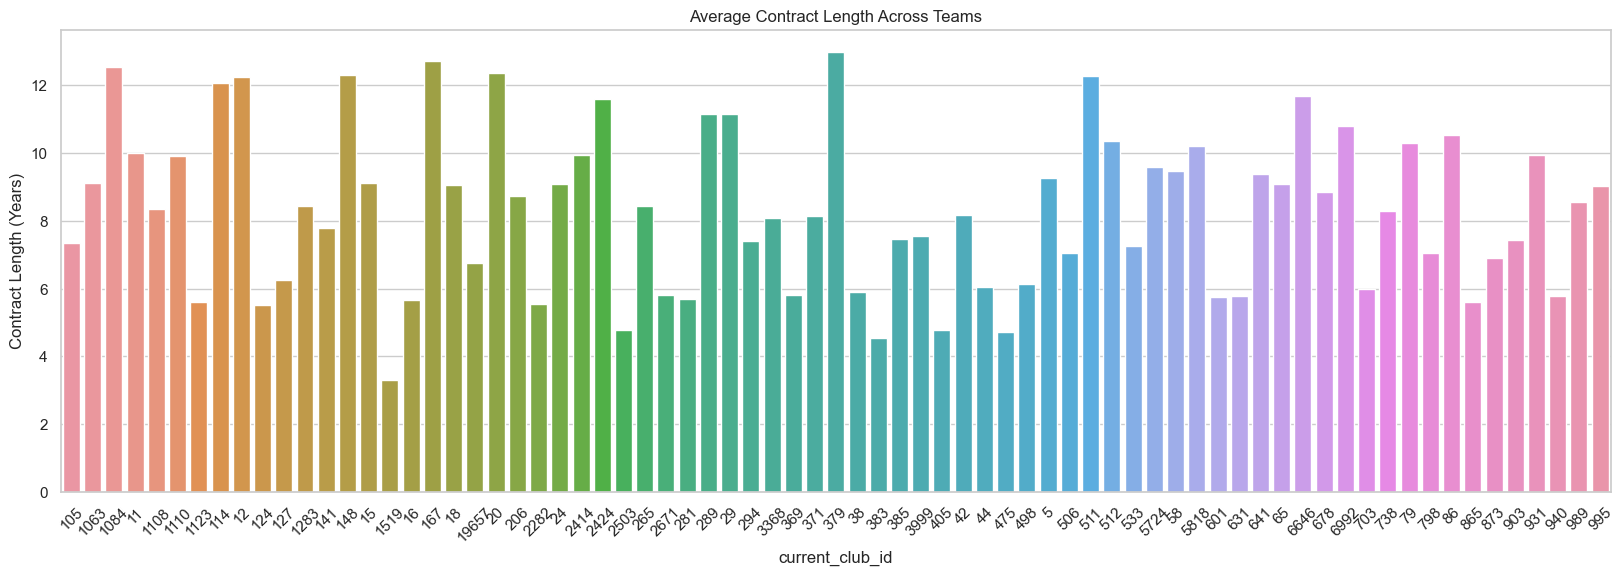

In [239]:
# Convert necessary columns to datetime
fc_df['contract_expiration_date'] = pd.to_datetime(fc_df['contract_expiration_date'])
fc_df['date'] = pd.to_datetime(fc_df['date'])

# 1. What is the average contract length of players across teams?
fc_df['contract_length_years'] = (fc_df['contract_expiration_date'] - fc_df['date']).dt.days / 365.25
avg_contract_length = fc_df.groupby('current_club_id')['contract_length_years'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=avg_contract_length, x='current_club_id', y='contract_length_years')
plt.title('Average Contract Length Across Teams')
plt.xticks(rotation=45)
plt.ylabel('Contract Length (Years)')
plt.show()

# INTERPRETATION: The average contract length across teams ranges from approximately 3 to over 12 years, with significant variation between clubs,
# indicating different strategies or policies for player retention and contract agreements.
#Some teams, such as those with club IDs around 1084, 114, and 379, have notably longer contract lengths, while others, like 124 and 1519,
#offer shorter average contract durations.

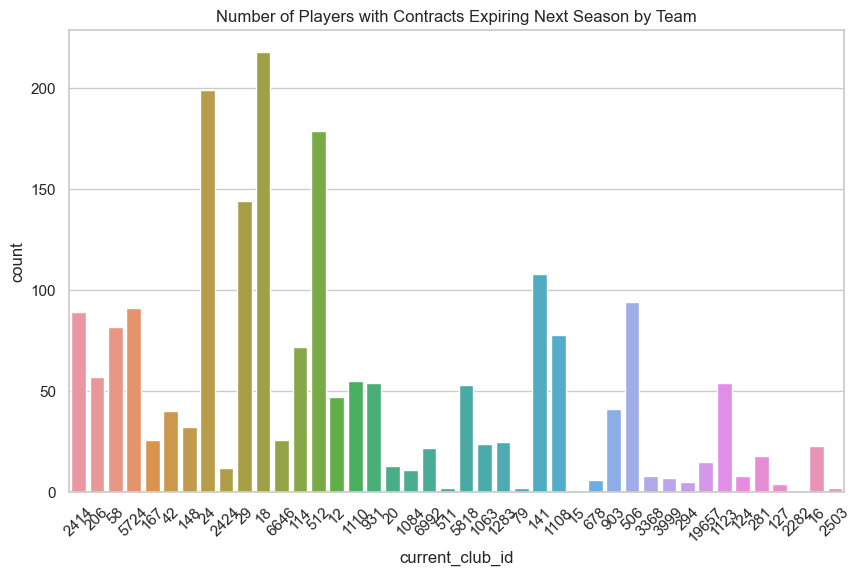

In [240]:
# 2. Which players have contracts expiring within the next season?
next_season = pd.Timestamp.now().year + 1
players_expiring_next_season = fc_df[fc_df['contract_expiration_date'].dt.year == next_season]

plt.figure(figsize=(10, 6))
sns.countplot(data=players_expiring_next_season, x='current_club_id')
plt.title('Number of Players with Contracts Expiring Next Season by Team')
plt.xticks(rotation=45)
plt.show()

# INTERPRETATION :The bar chart displays the number of players with contracts expiring next season, grouped by their current club ID. 
# The team with the ID '18' has the highest number of expiring contracts, over 200 players, while several teams have fewer than 50 expiring contracts.

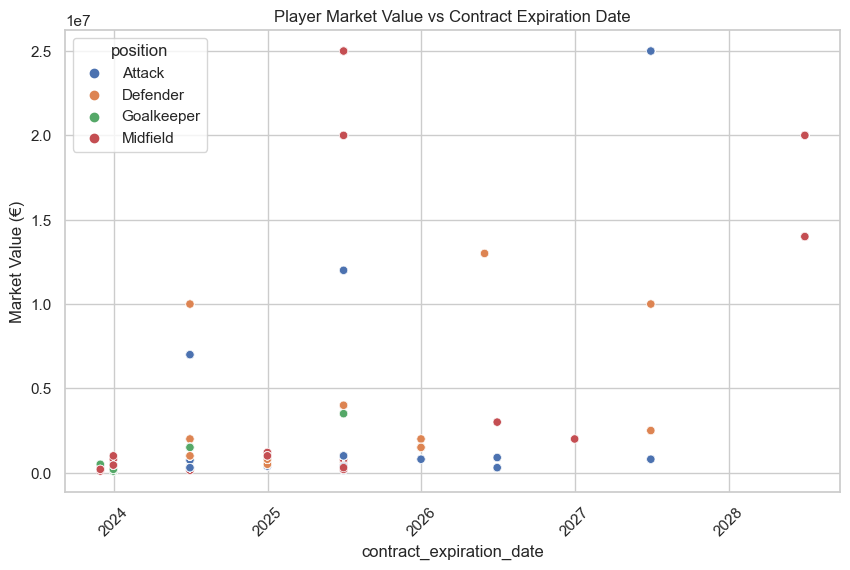

In [241]:
# 3. What is the relationship between a player's market value and their contract expiration date?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fc_df, x='contract_expiration_date', y='market_value_in_eur', hue='position')
plt.title('Player Market Value vs Contract Expiration Date')
plt.xticks(rotation=45)
plt.ylabel('Market Value (€)')
plt.show()

# INTERPREATATION: The scatterplot shows that players with contracts expiring around 2024 generally have lower market values, 
# while players with longer contracts (expiring after 2025) tend to have higher market values, particularly midfielders and attackers. 
# The highest market value observed exceeds €25 million for a midfielder with a contract expiring in 2026.

SUMMARY: 

Performance Analysis

Top Players: Aron Johannsson scored 63 goals, Jozy Altidore scored 35, and Christian Pulisic scored 31.
Top Teams: Borussia Verein Fuir Leibesubung led at home (410 goals), Borussia Dortmund led away (282 goals).
Home vs. Away Goals: Fabian Johnson scored 436 home and 317 away goals; Christian Pulisic scored 344 home and 289 away goals.
Competition Goals: Competition NL1 had the highest goal count (131), followed by ID L1 (122).
Probabilities: Home win probability is 45.02%; goal after substitution probability is 84.38%.

Player Profile and Market Value

Highest Market Value by Position: Christian Pulisic (Attack - €25M), Giovanni Reyna (Midfield - €25M), Sergino Dest (Defense - €10M), and Zack Steffen (Goalkeeper - €3.5M).
Market Value Trend: Average market value peaked at €7.85 million in 2019, decreasing to €5.92 million in 2020.
Performance vs. Market Value: Weak correlation (goals: 0.0228, assists: 0.0791), indicating factors beyond performance influence market value.

Team Comparison

Top Scoring Teams per Match: Aarhus Gymnastik Forening and AC Horsens scored 20 goals in match 2224542.
Competition Wins: Competition ID L1 showed the highest win rates (Home: 536 matches).
Average Possession: Most teams averaged a 90.0 possession rate.

Attendance and Stadium Analysis

Top Attendance Stadiums: Old Trafford (75,134 avg.), Signal Iduna Park (74,941 avg.).
Highest Team Attendance: Manchester United (75,134 for home games) and Sporting Clube de Portugal (65,849 for away games).
Attendance vs. Performance: Higher attendance for home wins (32,013) than draws (28,184) or away wins (27,094).
Top Competitions by Attendance: Competition ID L1 had the highest attendance (49,728,497 total).

Referee Analysis

Card Distribution: Felix Zwayer issued the most yellow cards (16), and Dr. Felix Brych officiated the most matches (62).
High Foul Referees: Felix Zwayer issued 17 fouls, followed by Dr. Felix Brych with 14.

Substitution Patterns

Average Substitution Time: Substitutions are made around the 90th minute on average.
Top Substituted Players: Fabian Johnson (185 substitutions) and Timothy Chandler (175).
Position-Based Substitutions: Attackers had the most substitutions (1,027), followed by Defenders (965).

Event Analysis

Event Distribution by Competition: L1 had the most substitutions (992), goals (104), and cards (47).
Time-Based Event Patterns: Last 10 minutes saw the most goals (83) and cards (10).

Competition Analysis

Goal Scoring: Domestic competitions saw an average of 3.75 goals per match; international competitions averaged 2.75, though this difference wasn't statistically significant.

BUSINESS INSIGHTS AND IMPLICATIONS: 

1. Performance Analysis

Insight: Key players like Aron Johannsson, Jozy Altidore, and Christian Pulisic drive substantial team performance, with high goal counts.

Business Implication: Investing in high-performing strikers and offensive tactics may provide a competitive edge. Emphasizing recruitment or development around goal-oriented players and strategies could enhance team success.

Further Strategy: Focusing on the defensive strategies of top-performing teams like Borussia Dortmund and Borussia Verein Fuir Leibesubung (both strong at home and away) may optimize defensive coaching.

2. Player Profile & Market Value

Insight: Christian Pulisic and Giovanni Reyna hold high market values, reflecting both performance and strategic market perception.

Business Implication: Teams could focus on players with substantial potential for market appreciation in positions where competition is high, like midfield and attack.

Further Strategy: Market value doesn’t correlate strongly with direct stats (goals/assists), so scouting should include intangibles like potential, adaptability, and team influence. Identifying rising talents with future market value can be a cost-effective recruitment approach.

3. Team Comparison

Insight: Teams with consistent average possession and goal-scoring rates (e.g., AC Horsens and Football Club Utrecht) highlight effective offensive play, whereas the win-loss patterns across competitions reveal areas for improvement.

Business Implication: Competitive analysis across leagues reveals strategic insights for player allocation and game tactics. Teams can strengthen weak points or emulate successful tactics seen in higher-performing teams.

Further Strategy: Analyzing possession and conversion rates can help isolate tactical gaps. Teams with high average possession but fewer wins could benefit from fine-tuning their transition and scoring tactics.

4. Attendance & Stadium Analysis

Insight: Stadiums like Old Trafford and Signal Iduna Park attract the largest audiences, with a noticeable attendance increase for home wins.

Business Implication: Higher attendance for wins implies that team performance boosts fan engagement. Targeting winning home games as focal points for marketing or merchandising can enhance revenue.

Further Strategy: Investments in fan engagement strategies (exclusive matchday experiences, fan clubs, etc.) around high-attendance stadiums can enhance long-term loyalty and revenue.

5. Referee Analysis

Insight: Referees like Felix Zwayer and Dr. Felix Brych influence game dynamics, as indicated by high card counts and frequent officiating.

Business Implication: Game officials play a role in match flow and aggression. Teams may prepare differently when assigned stricter referees, adjusting aggressiveness or positioning to avoid penalties.

Further Strategy: Analysis of referee tendencies can help in strategizing gameplay; this insight can be shared with coaching staff for adjustments in player conduct during highly officiated games.

6. Substitution Patterns

Insight: Most substitutions happen close to the 90th minute, especially for attackers and defenders, which are typically tactical moves.

Business Implication: Substitution timing can affect game outcomes, particularly when done for tactical purposes or to maintain player stamina. Teams that strategically substitute fresh attackers toward the end of the game might increase scoring chances.

Further Strategy: Analyzing opponent substitution patterns could be useful in predicting late-game tactics. Training players to be versatile in these late substitutions may optimize end-game performance.

7. Event Analysis

Insight: Event frequency spikes in the last 10 minutes, emphasizing a tactical phase in matches where teams push for final results.

Business Implication: The last 10 minutes are crucial for goal-scoring opportunities and fouls, indicating a high-stakes phase in matches. Coaches may strategize substitutions, positioning, and heightened defense during this period.

Further Strategy: Focused training on resilience and tactical discipline in the closing minutes may improve end-game performance.

8. Competition Analysis

Insight: Certain competitions, like L1, have higher average goals and attendance, suggesting more competitive or attractive games.

Business Implication: Participation in high-attendance, high-scoring competitions could bring visibility and sponsorship opportunities. Teams can also prioritize preparation for leagues where scoring is high to maximize competitive advantage.

Further Strategy: Tailored recruitment for competitions with specific playing styles can help teams optimize performance in targeted leagues.

9. Player Attributes & Demographics

Insight: The average player profile (age, height, preferred foot) varies minimally across teams, but recruitment can focus on optimizing physical attributes for specific roles.

Business Implication: Player fit goes beyond raw performance data. For positions like defense, height and physicality might be prioritized, while midfield and forward roles may value agility and foot preference.

Further Strategy: Developing a detailed profile matrix for ideal physical and technical attributes in each role can refine recruitment and development processes.

10. Contract Management

Insight: High-value players, managed by key agents, provide substantial competitive advantage, but contract expirations need timely handling.

Business Implication: Clubs can avoid last-minute contract renewals for valuable players, potentially reducing the risk of losing top talent. By tracking contract expirations and renewals, teams can maintain continuity in high-performing squads.

Further Strategy: Proactive contract negotiations and extensions for high-performing players and young talent may prevent market-driven escalations, ensuring continuity in the team’s core.